#EDA

##Data Cleaning

In [ ]:
import sys, subprocess
IN_COLAB = "google.colab" in sys.modules


In [ ]:
# If running in Colab, mount Google Drive
if IN_COLAB:
    from google.colab import drive
    drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Episodes data
episodes_url = "https://drive.google.com/uc?export=download&id=1Q2s1TZAl1epx_-hi8yXWQv12UJGt_LYe"
episodes_data = pd.read_csv(episodes_url)

# Loadouts data
loadouts_url = "https://drive.google.com/uc?export=download&id=1xym94LM-MIvEWI-IauIJViR4mXaqMiB0"
loadouts_data = pd.read_csv(loadouts_url)

# Seasons data
seasons_url = "https://drive.google.com/uc?export=download&id=1M1cEpgPXD1PTLywN2JD7Dn8-QEWcUfWQ"
seasons_data = pd.read_csv(seasons_url)

# Survivalists data
survivalists_url = "https://drive.google.com/uc?export=download&id=1L600G_6QA1XVZGKl3Ky5AC9FWC4Uu3po"
survivalists_data = pd.read_csv(survivalists_url)
# View first few rows
print(episodes_data.head())
print(loadouts_data.head())
print(seasons_data.head())
print(survivalists_data.head())

  version  season  episode_number_overall  episode               title  \
0      US       1                       1        1    And So It Begins   
1      US       1                       2        2     Of Wolf and Man   
2      US       1                       3        3  The Talons of Fear   
3      US       1                       4        4             Stalked   
4      US       1                       5        5       Winds of Hell   

     air_date  viewers                                              quote  \
0  2015-06-18    1.582  I went to the woods because I wished to live d...   
1  2015-06-25    1.697  If you live among wolves you have to act like ...   
2  2015-07-02    1.864  Extinction is the rule. Survival is the except...   
3  2015-07-09    2.082  Hunger, love, pain, fear are some of those inn...   
4  2015-07-16    2.082    The strong survive, but the courageous triumph.   

                author  imdb_rating  n_ratings  
0  Henry David Thoreau          7.5      13

## Comprehensive EDA Overview

This section performs a **comprehensive exploratory data analysis (EDA)** of the Alone TV show datasets that were loaded above:

- **`episodes_data`**: Episode-level information such as air dates, viewership, and IMDb ratings.
- **`loadouts_data`**: Items selected by each survivalist (gear loadouts).
- **`seasons_data`**: Season-level metadata such as location, country, and number of survivors.
- **`survivalists_data`**: Participant-level demographics and outcomes (days lasted, result, reasons for tapping out).

The goals of this EDA are to:

- **Understand the structure** of each dataset (sizes, data types, missing values).
- **Summarize key variables** (distributions and summary statistics).
- **Explore relationships** within and across datasets (e.g., seasons vs. locations, loadouts vs. survival outcomes).
- **Document findings clearly** so the notebook is self-contained and understandable without external documentation.

In [3]:
# High-level overview of all four datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# Collect datasets in a dictionary for easy iteration
datasets = {
    "episodes_data": episodes_data,
    "loadouts_data": loadouts_data,
    "seasons_data": seasons_data,
    "survivalists_data": survivalists_data,
}

for name, df in datasets.items():
    print(f"\n{'=' * 80}")
    print(f"DATASET: {name}")
    print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
    print("\nColumn names:")
    print(df.columns.tolist())
    print("\nPreview (first 5 rows):")
    display(df.head())
    print("\nData types:")
    print(df.dtypes)
    print("\nBasic numeric summary (describe):")
    display(df.describe(include=[np.number]).T)
    print("\nBasic categorical summary (top-level describe):")
    display(df.describe(include=["object"]).T)


DATASET: episodes_data
Shape: 98 rows x 11 columns

Column names:
['version', 'season', 'episode_number_overall', 'episode', 'title', 'air_date', 'viewers', 'quote', 'author', 'imdb_rating', 'n_ratings']

Preview (first 5 rows):


,version,season,episode_number_overall,episode,title,air_date,viewers,quote,author,imdb_rating,n_ratings
0,US,1,1,1,And So It Begins,2015-06-18,1.582,I went to the woods because I wished to live d...,Henry David Thoreau,7.5,135.0
1,US,1,2,2,Of Wolf and Man,2015-06-25,1.697,If you live among wolves you have to act like ...,Nikita Khrushchev,7.7,110.0
2,US,1,3,3,The Talons of Fear,2015-07-02,1.864,Extinction is the rule. Survival is the except...,Carl Sagan,7.7,104.0
3,US,1,4,4,Stalked,2015-07-09,2.082,"Hunger, love, pain, fear are some of those inn...",Albert Einstein,7.7,104.0
4,US,1,5,5,Winds of Hell,2015-07-16,2.082,"The strong survive, but the courageous triumph.",Michael Scott,7.6,99.0



Data types:
version                    object
season                      int64
episode_number_overall      int64
episode                     int64
title                      object
air_date                   object
viewers                   float64
quote                      object
author                     object
imdb_rating               float64
n_ratings                 float64
dtype: object

Basic numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
season,98.0,4.969388,2.633856,1.000,3.000,5.000,7.0000,9.000
episode_number_overall,98.0,50.163265,29.039857,1.000,25.250,50.500,74.7500,100.000
episode,98.0,5.979592,3.210741,1.000,3.000,6.000,9.0000,13.000
viewers,83.0,1.527880,0.270149,0.989,1.344,1.507,1.6875,2.375
imdb_rating,93.0,7.821505,0.365302,6.900,7.600,7.800,8.1000,8.800
n_ratings,93.0,62.924731,20.081484,5.000,48.000,63.000,68.0000,135.000



Basic categorical summary (top-level describe):


,count,unique,top,freq
version,98,1,US,98
title,98,98,And So It Begins,1
air_date,98,97,2016-07-14,2
quote,98,96,The very basic core of a man's living spirit i...,2
author,98,84,John Muir,4



DATASET: loadouts_data
Shape: 940 rows x 6 columns

Column names:
['version', 'season', 'name', 'item_number', 'item_detailed', 'item']

Preview (first 5 rows):


,version,season,name,item_number,item_detailed,item
0,US,1,Alan Kay,1,Saw,Saw
1,US,1,Alan Kay,2,Axe,Axe
2,US,1,Alan Kay,3,Sleeping bag,Sleeping bag
3,US,1,Alan Kay,4,Large 2-quart pot,Pot
4,US,1,Alan Kay,5,Ferro rod,Ferro rod



Data types:
version          object
season            int64
name             object
item_number       int64
item_detailed    object
item             object
dtype: object

Basic numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
season,940.0,4.957447,2.535855,1.0,3.0,5.0,7.0,9.0
item_number,940.0,5.500000,2.873810,1.0,3.0,5.5,8.0,10.0



Basic categorical summary (top-level describe):


,count,unique,top,freq
version,940,1,US,940
name,940,84,Nicole Apelian,20
item_detailed,940,198,Ferro rod,66
item,940,27,Pot,92



DATASET: seasons_data
Shape: 9 rows x 8 columns

Column names:
['version', 'season', 'location', 'country', 'n_survivors', 'lat', 'lon', 'date_drop_off']

Preview (first 5 rows):


,version,season,location,country,n_survivors,lat,lon,date_drop_off
0,US,1,Quatsino,Canada,10,50.72444,-127.498056,NaN
1,US,2,Quatsino,Canada,10,50.72444,-127.498056,NaN
2,US,3,Patagonia,Argentina,10,-41.00000,-68.000000,NaN
3,US,4,Quatsino,Canada,14,50.72444,-127.498056,NaN
4,US,5,Selenge Province,Mongolia,10,49.75000,106.500000,NaN



Data types:
version           object
season             int64
location          object
country           object
n_survivors        int64
lat              float64
lon              float64
date_drop_off     object
dtype: object

Basic numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
season,9.0,5.000000,2.738613,1.000000,3.000000,5.000000,7.00,9.000000
n_survivors,9.0,10.444444,1.333333,10.000000,10.000000,10.000000,10.00,14.000000
lat,9.0,43.872283,32.218259,-41.000000,50.724440,50.724440,59.66,61.500278
lon,9.0,-84.480000,75.840033,-127.498056,-127.498056,-114.001111,-68.00,106.500000



Basic categorical summary (top-level describe):


,count,unique,top,freq
version,9,1,US,9
location,9,7,Quatsino,2
country,9,3,Canada,7
date_drop_off,3,3,2019-09-18,1



DATASET: survivalists_data
Shape: 94 rows x 16 columns

Column names:
['season', 'name', 'age', 'gender', 'city', 'state', 'country', 'result', 'days_lasted', 'medically_evacuated', 'reason_tapped_out', 'reason_category', 'team', 'day_linked_up', 'profession', 'url']

Preview (first 5 rows):


,season,name,age,gender,city,state,country,result,days_lasted,medically_evacuated,reason_tapped_out,reason_category,team,day_linked_up,profession,url
0,1,Alan Kay,40,Male,Blairsville,Georgia,United States,1,56,False,NaN,NaN,NaN,NaN,Corrections Officer,alan-kay
1,1,Sam Larson,22,Male,Lincoln,Nebraska,United States,2,55,False,Lost the mind game,Family / personal,NaN,NaN,Outdoor Gear Retailer,sam-larson
2,1,Mitch Mitchell,34,Male,Bellingham,Massachusetts,United States,3,43,False,Realized he should actually be around for his ...,Family / personal,NaN,NaN,Butcher,mitch-mitchell
3,1,Lucas Miller,32,Male,Quasqueton,Iowa,United States,4,39,False,Felt content with what he had done,Family / personal,NaN,NaN,Survivalist and Wildlife Therapist/Natural Hea...,lucas-miller
4,1,Dustin Feher,37,Male,Pittsburgh,Pennsylvania,United States,5,8,False,Fear of storm,Family / personal,NaN,NaN,Carpenter,dustin-feher



Data types:
season                   int64
name                    object
age                      int64
gender                  object
city                    object
state                   object
country                 object
result                   int64
days_lasted              int64
medically_evacuated       bool
reason_tapped_out       object
reason_category         object
team                    object
day_linked_up          float64
profession              object
url                     object
dtype: object

Basic numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
season,94.0,4.957447,2.548096,1.0,3.00,5.0,7.00,9.0
age,94.0,37.936170,8.844910,19.0,31.00,38.5,44.00,61.0
result,94.0,5.276596,2.826161,1.0,3.00,5.0,7.75,10.0
days_lasted,94.0,39.042553,27.849409,0.0,10.50,39.5,63.75,100.0
day_linked_up,8.0,9.000000,0.755929,8.0,8.75,9.0,9.25,10.0



Basic categorical summary (top-level describe):


,count,unique,top,freq
name,94,84,Sam Larson,2
gender,94,2,Male,74
city,94,77,Salt Lake City,3
state,93,40,Alaska,11
country,94,4,United States,79
reason_tapped_out,84,61,Starvation,7
reason_category,84,3,Medical / health,45
team,14,7,Baird (brothers),2
profession,94,80,Carpenter,4
url,94,87,brook-and-dave-whipple,2


### Data cleaning and standardization

To make downstream analysis easier and more consistent, we:

- **Standardize column names** to snake_case (lowercase, underscores instead of spaces or dashes).
- **Create working copies** of the original data (`episodes`, `loadouts`, `seasons`, `survivalists`) so the raw dataframes remain unchanged.
- **Convert date-like columns** to true datetime objects where applicable.
- **Check and summarize missing values** for each dataset.

In [6]:
# Create cleaned working copies of the datasets
def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Return a copy of df with standardized, snake_case column names."""
    df = df.copy()
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

# Working copies with standardized column names
episodes = standardize_columns(episodes_data)
loadouts = standardize_columns(loadouts_data)
seasons = standardize_columns(seasons_data)
survivalists = standardize_columns(survivalists_data)

# Convert date-like columns to datetime if present
if "air_date" in episodes.columns:
    episodes["air_date"] = pd.to_datetime(episodes["air_date"], errors="coerce")
if "date_drop_off" in seasons.columns:
    seasons["date_drop_off"] = pd.to_datetime(seasons["date_drop_off"], errors="coerce")

# Compute missing value summary
def missing_summary(df: pd.DataFrame) -> pd.DataFrame:
    missing_count = df.isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    return pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct})

for name, df in {
    "episodes": episodes,
    "loadouts": loadouts,
    "seasons": seasons,
    "survivalists": survivalists,
}.items():
    print(f"\n{'-' * 60}")
    print(f"Missing values for {name}:")
    display(missing_summary(df).sort_values("missing_count", ascending=False))


------------------------------------------------------------
Missing values for episodes:


,missing_count,missing_pct
viewers,15,15.306122
n_ratings,5,5.102041
imdb_rating,5,5.102041
episode_number_overall,0,0.000000
season,0,0.000000
version,0,0.000000
episode,0,0.000000
air_date,0,0.000000
title,0,0.000000
author,0,0.000000



------------------------------------------------------------
Missing values for loadouts:


,missing_count,missing_pct
version,0,0.0
season,0,0.0
name,0,0.0
item_number,0,0.0
item_detailed,0,0.0
item,0,0.0



------------------------------------------------------------
Missing values for seasons:


,missing_count,missing_pct
date_drop_off,6,66.666667
version,0,0.000000
location,0,0.000000
season,0,0.000000
country,0,0.000000
n_survivors,0,0.000000
lat,0,0.000000
lon,0,0.000000



------------------------------------------------------------
Missing values for survivalists:


,missing_count,missing_pct
day_linked_up,86,91.489362
team,80,85.106383
reason_tapped_out,10,10.638298
reason_category,10,10.638298
state,1,1.063830
season,0,0.000000
age,0,0.000000
name,0,0.000000
result,0,0.000000
country,0,0.000000


### Univariate exploration of key variables

In this section we:

- **Summarize numeric variables** (e.g., IMDb ratings, viewers, days lasted, ages).
- **Summarize categorical variables** (e.g., versions, seasons, locations, genders, tap-out reasons).
- **Visualize distributions** with histograms and boxplots to spot skewness, outliers, and typical ranges.

Episodes: numeric variable distributions


<Figure size 1800x1000 with 0 Axes>

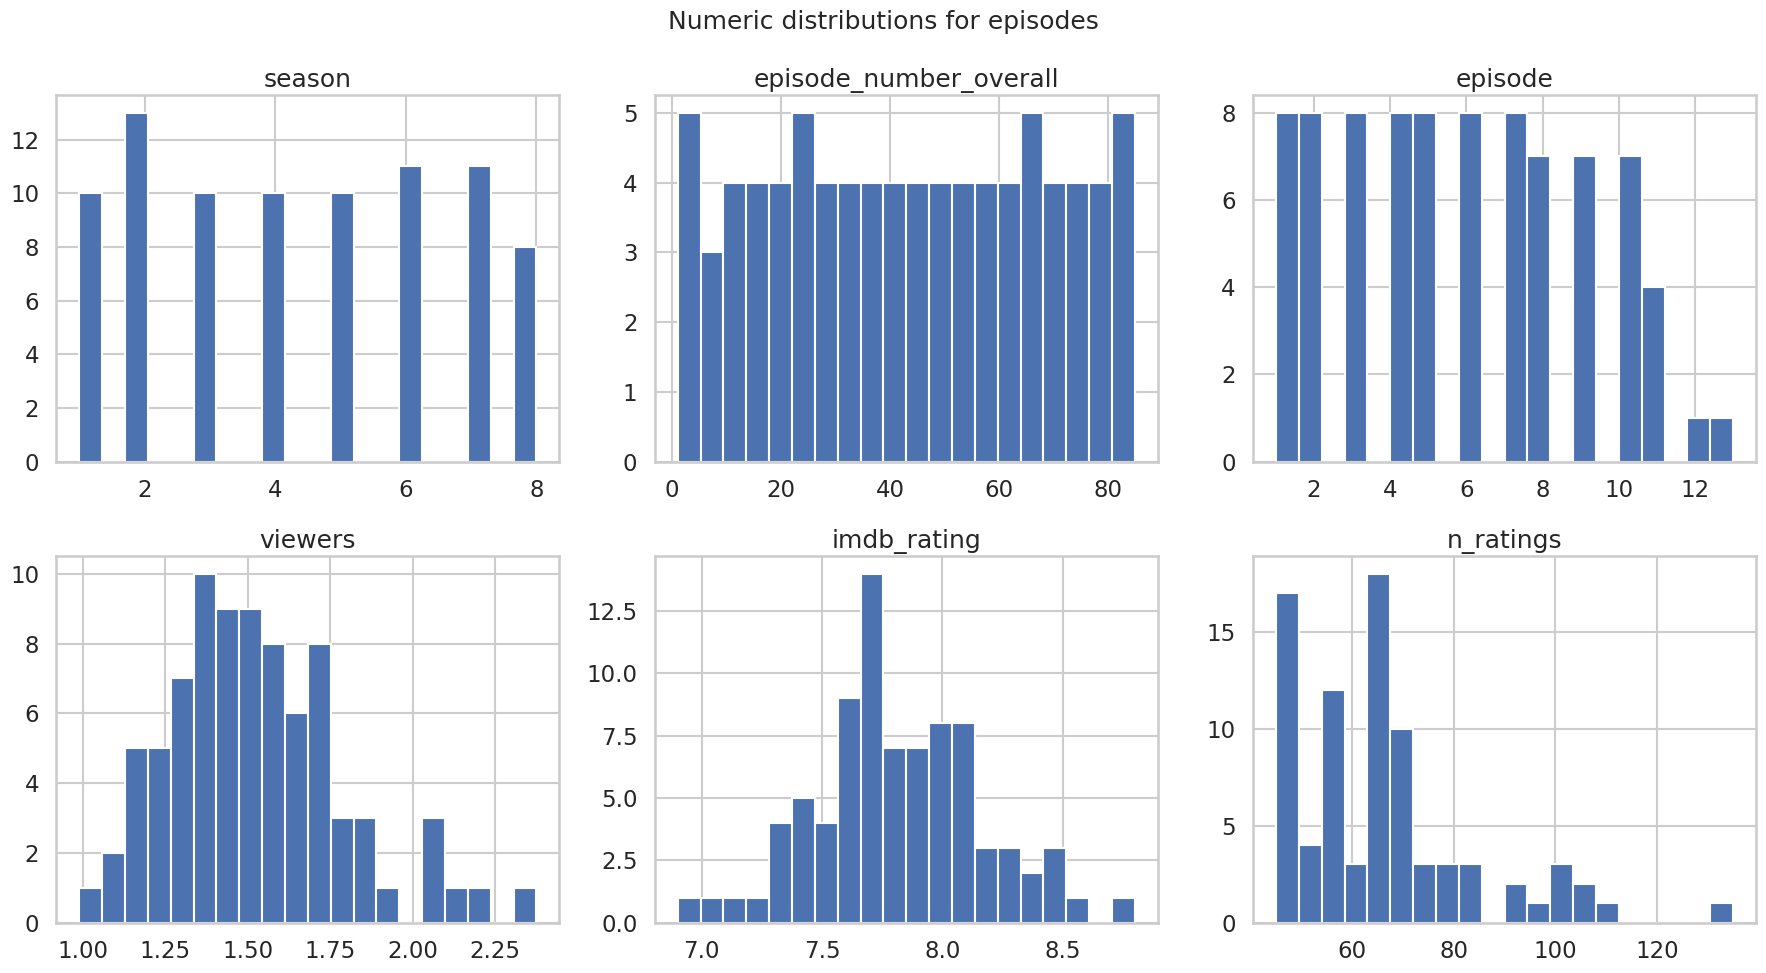

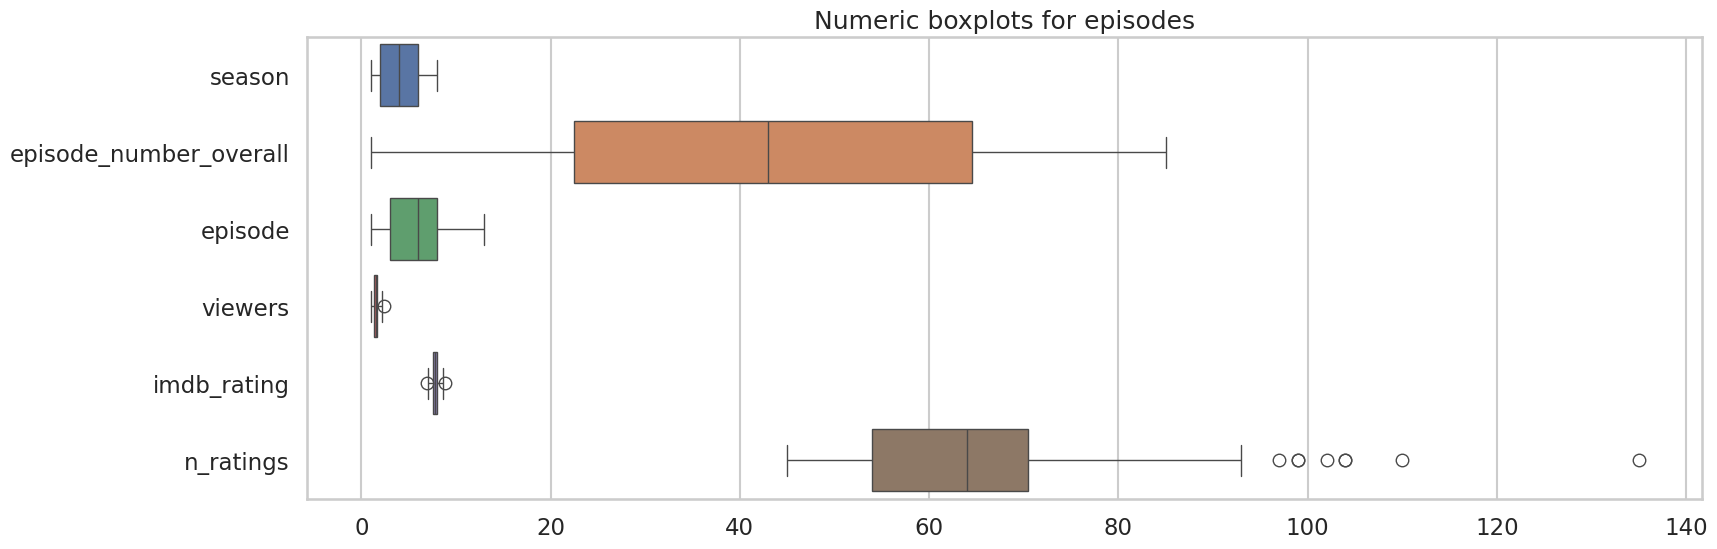


Episodes: top values for 'version'


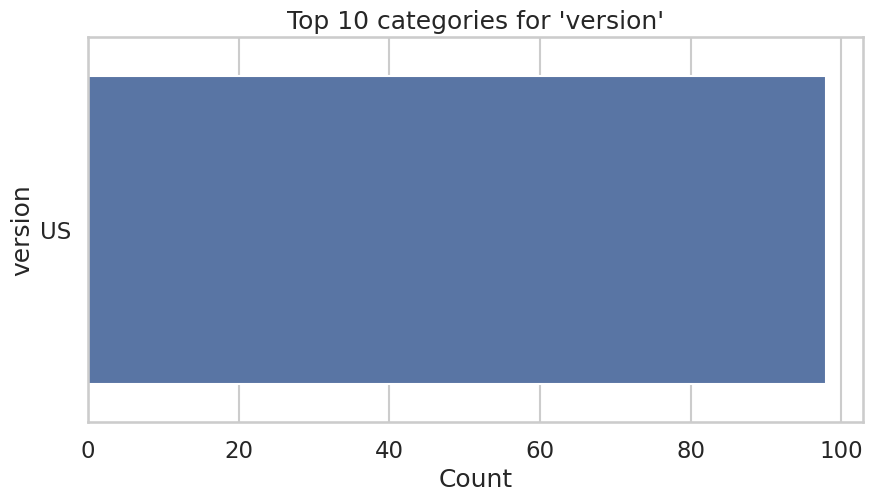


Episodes: top values for 'season'


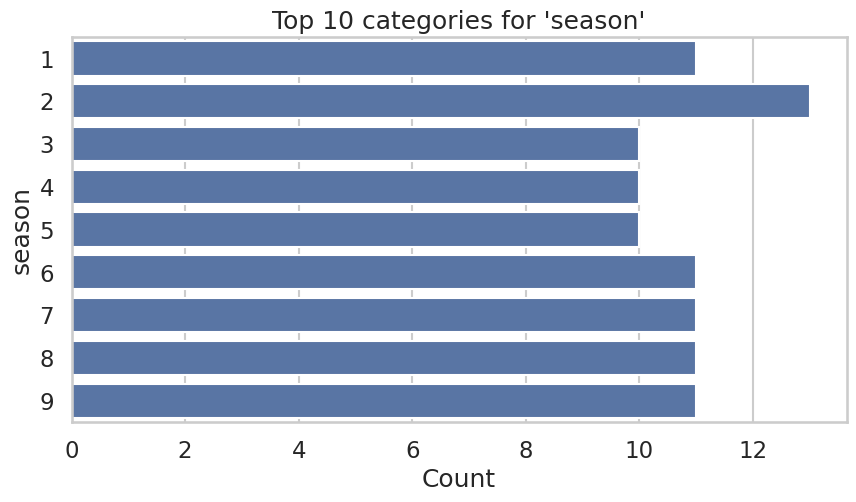


Episodes: top values for 'author'


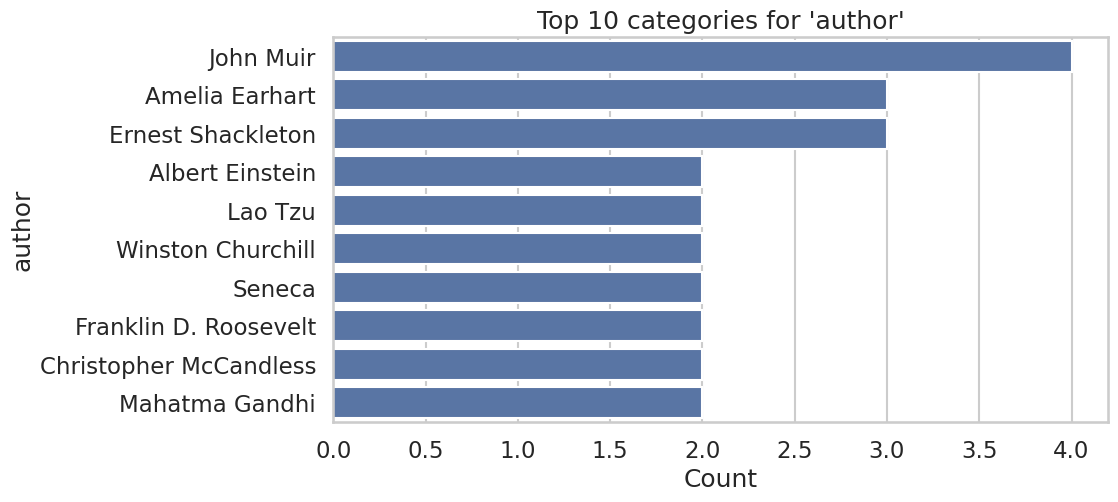


Seasons: numeric variable distributions


<Figure size 1800x1000 with 0 Axes>

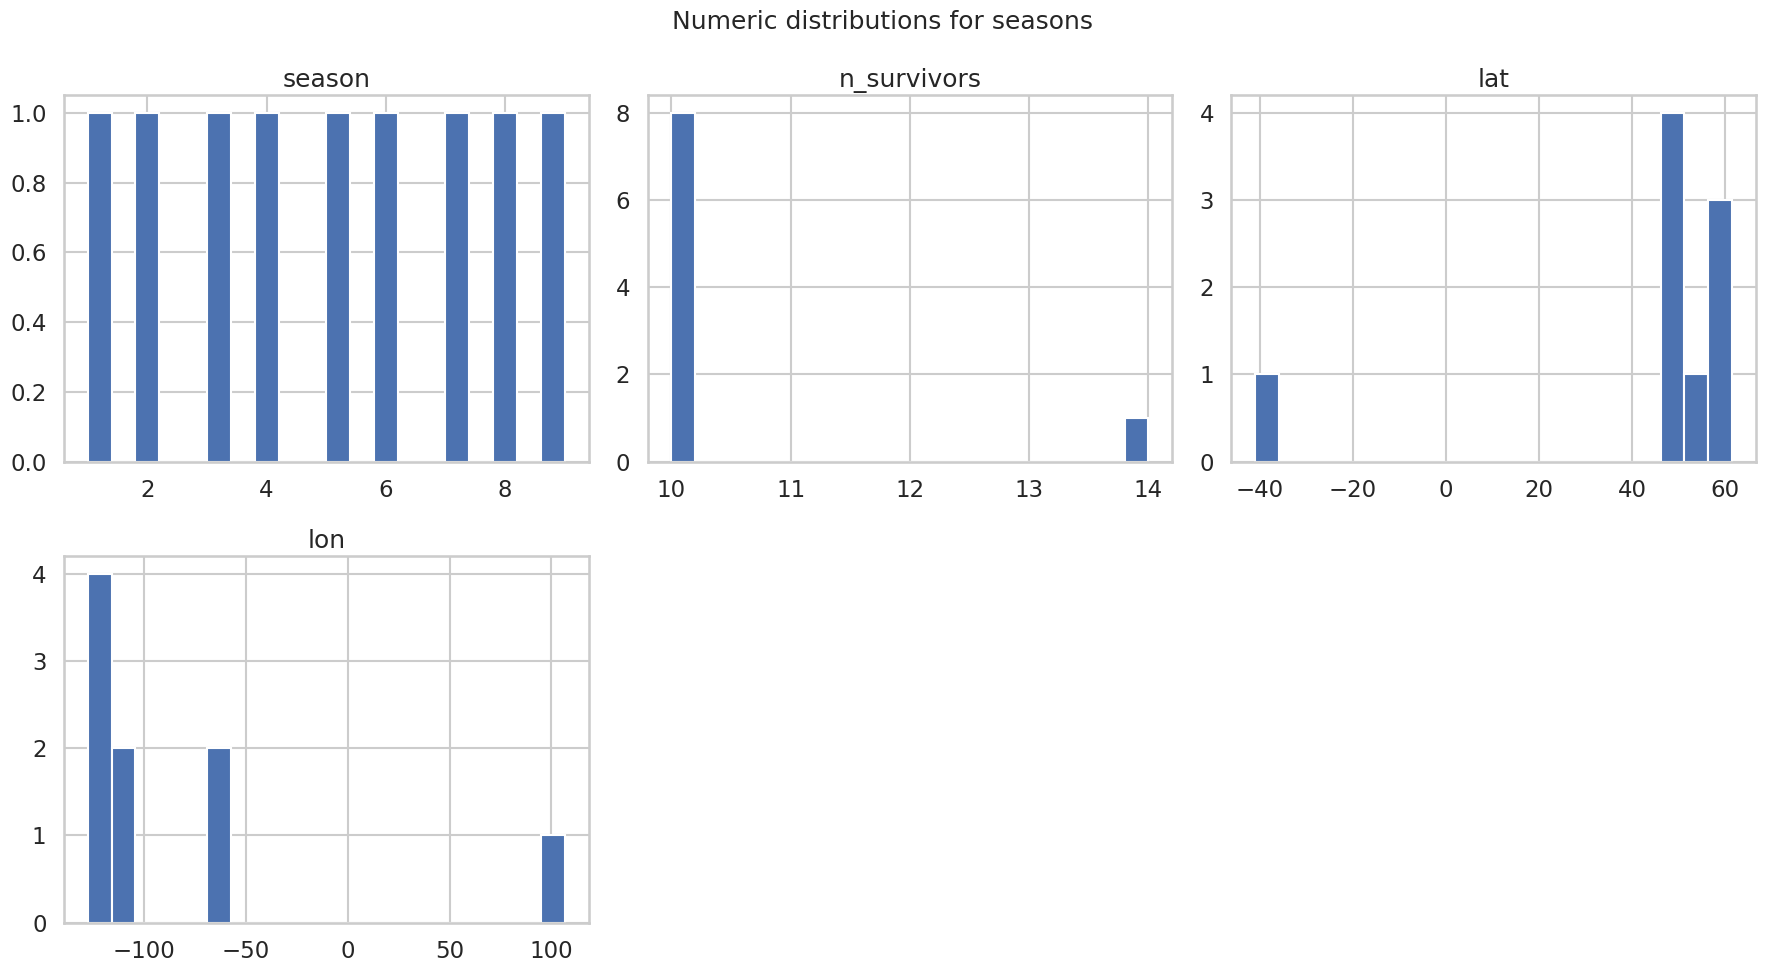

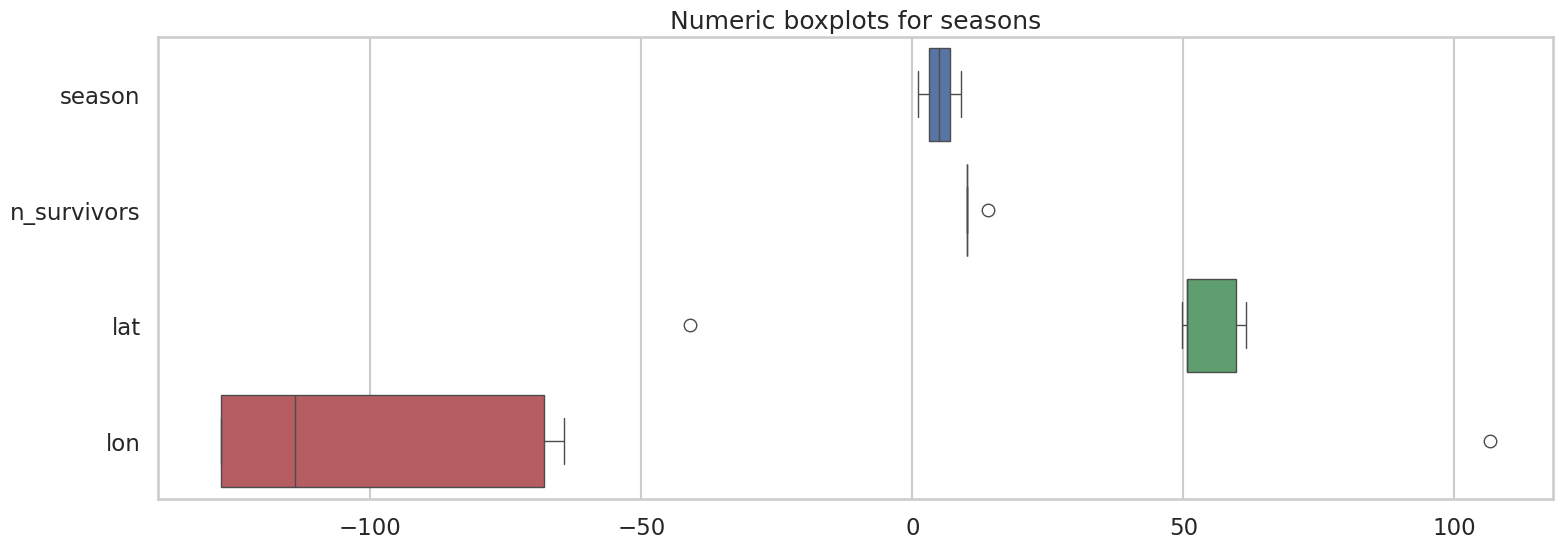


Seasons: top values for 'location'


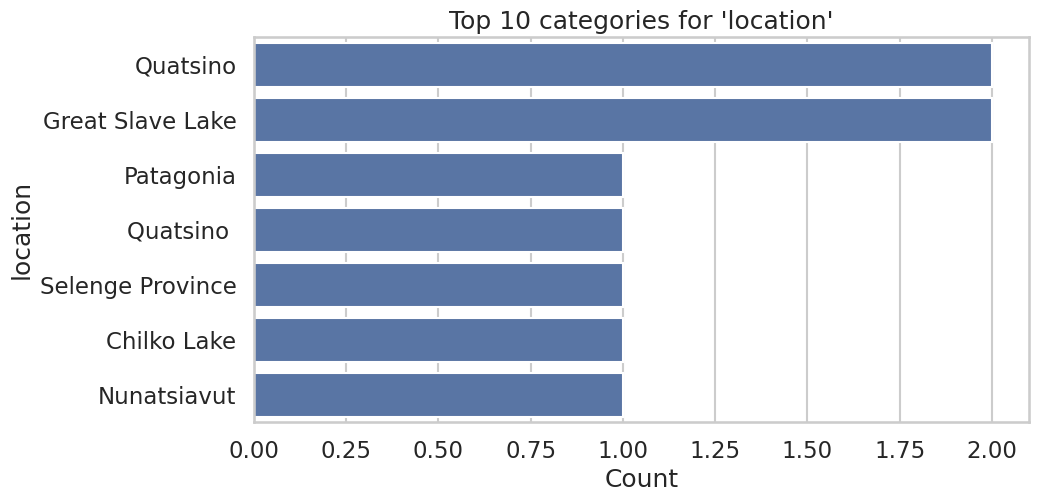


Seasons: top values for 'country'


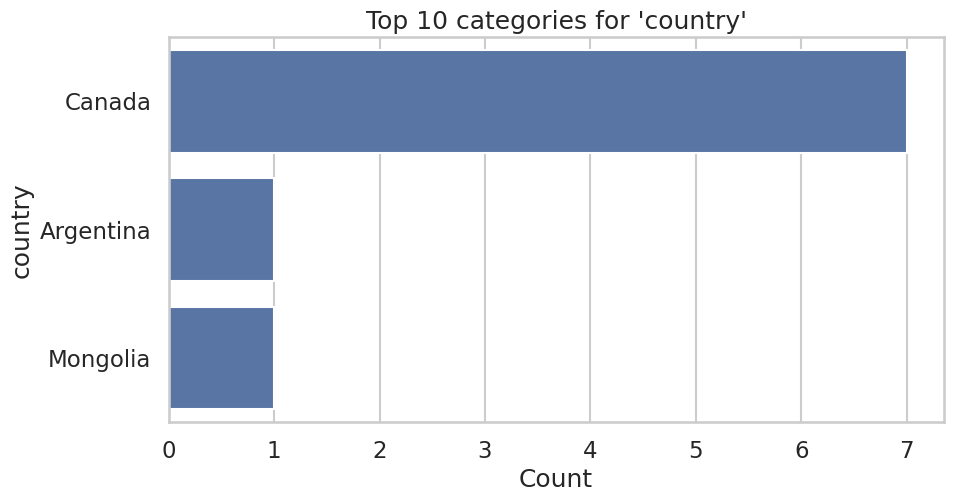


Survivalists: numeric variable distributions


<Figure size 1800x1000 with 0 Axes>

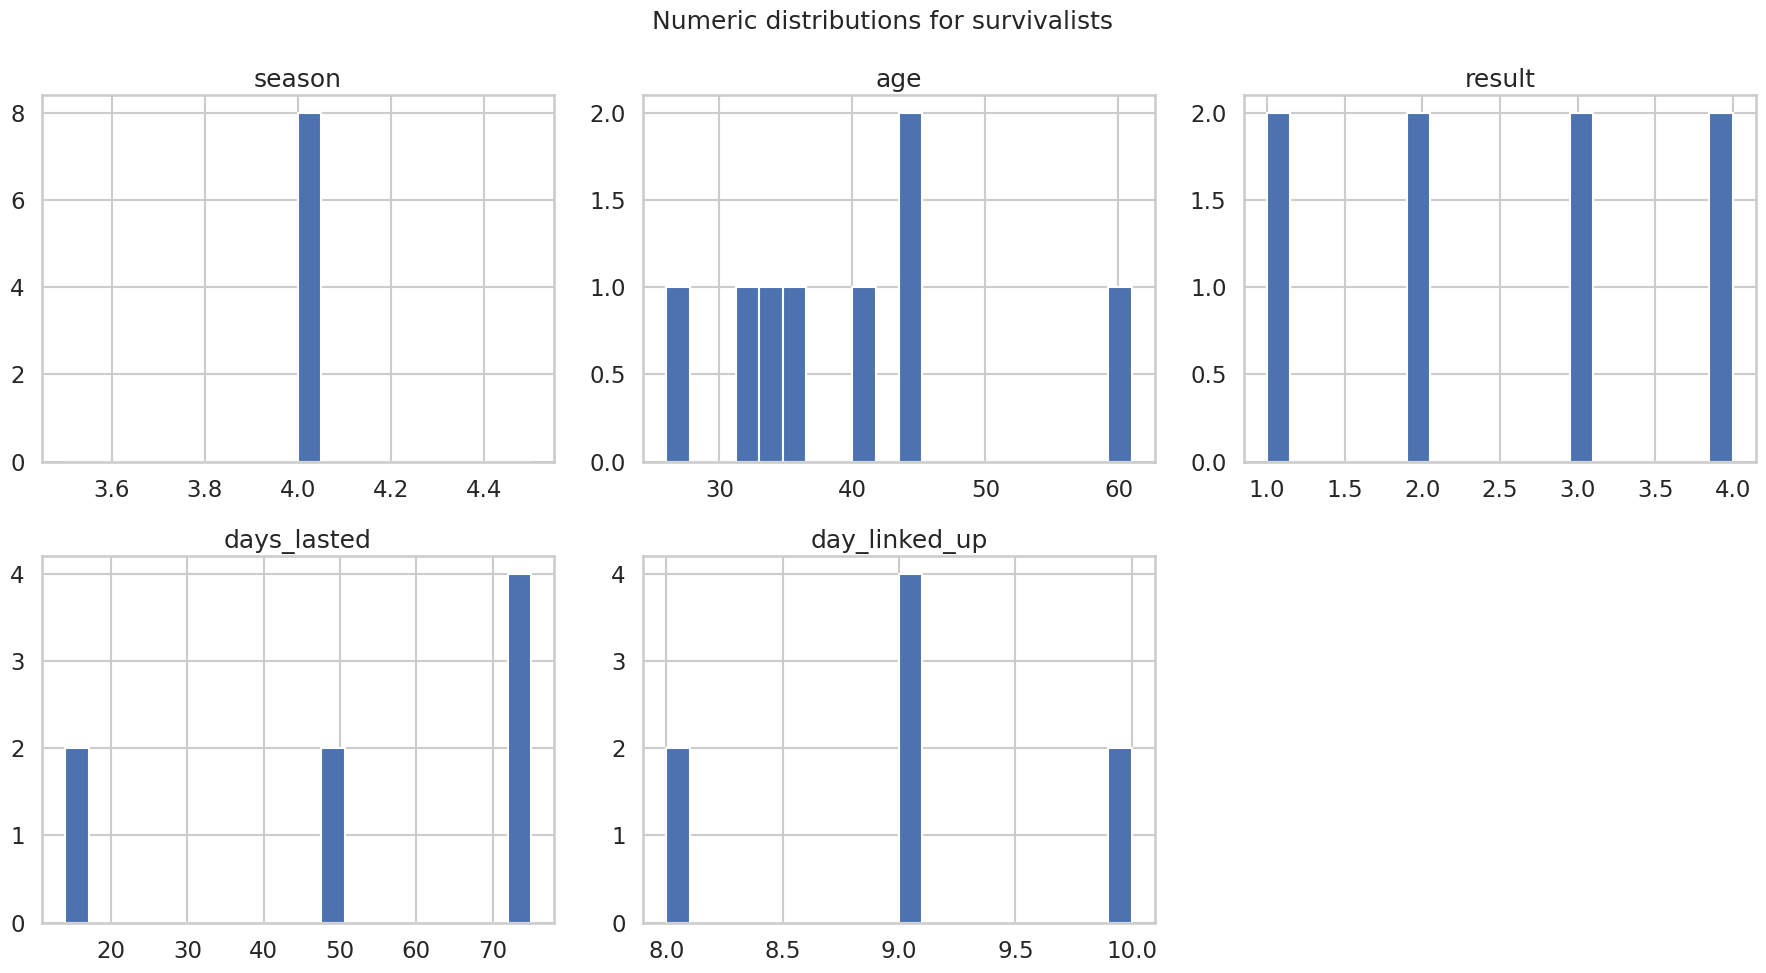

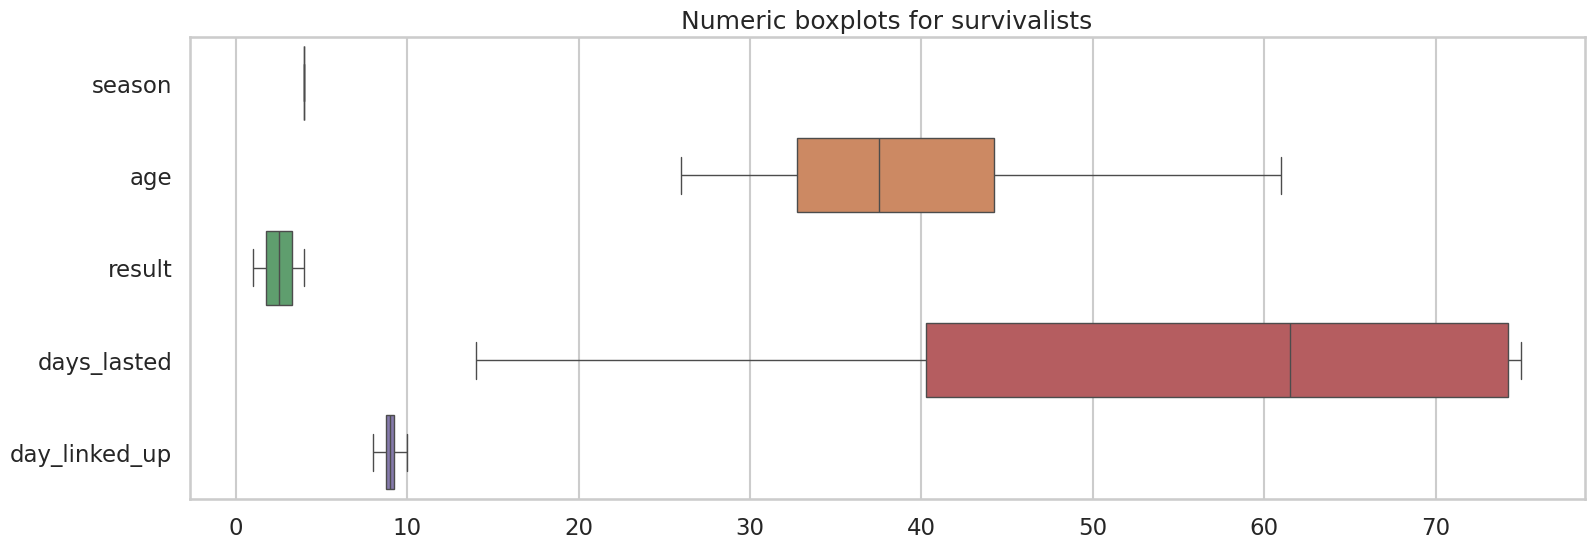


Survivalists: top values for 'gender'


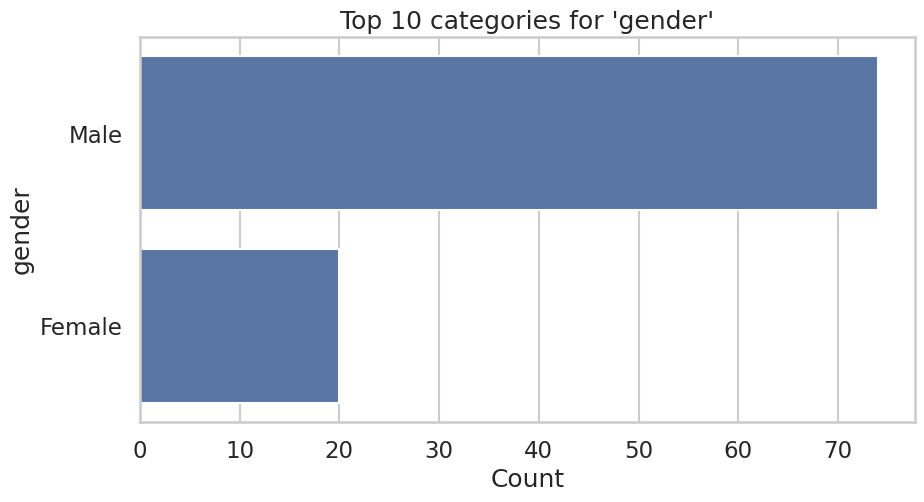


Survivalists: top values for 'reason_category'


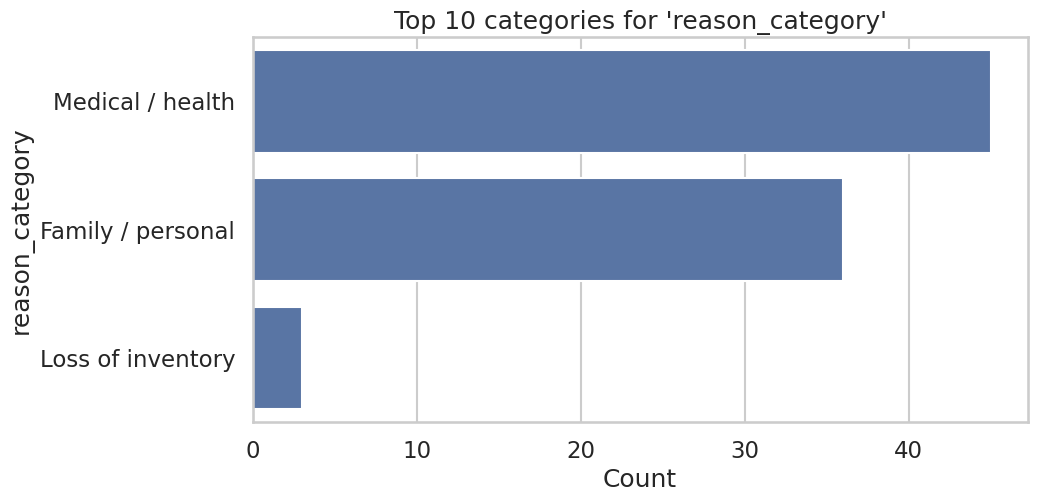


Survivalists: top values for 'result'


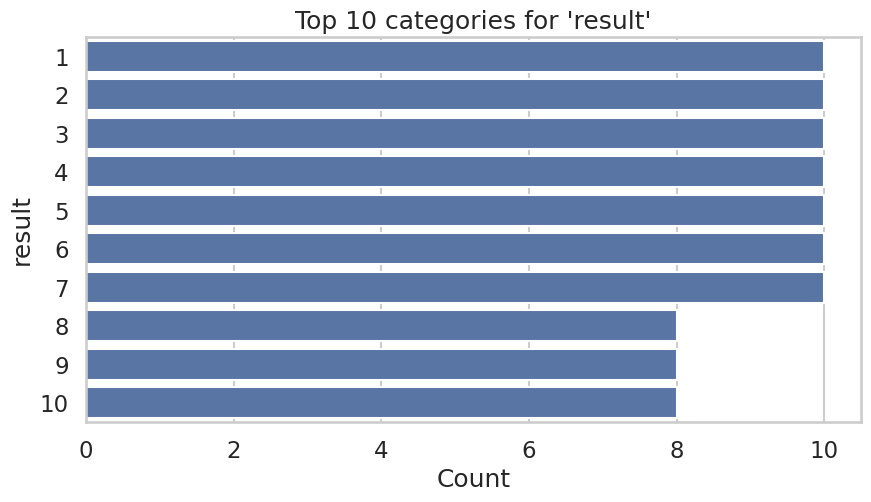


Loadouts: most frequently chosen items

Loadouts: top values for 'item'


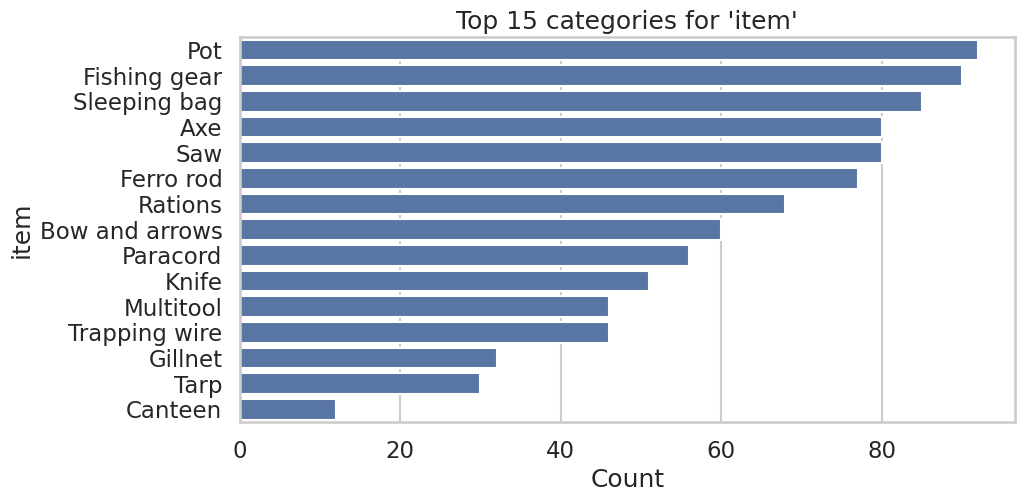


Loadouts: top values for 'item_detailed'


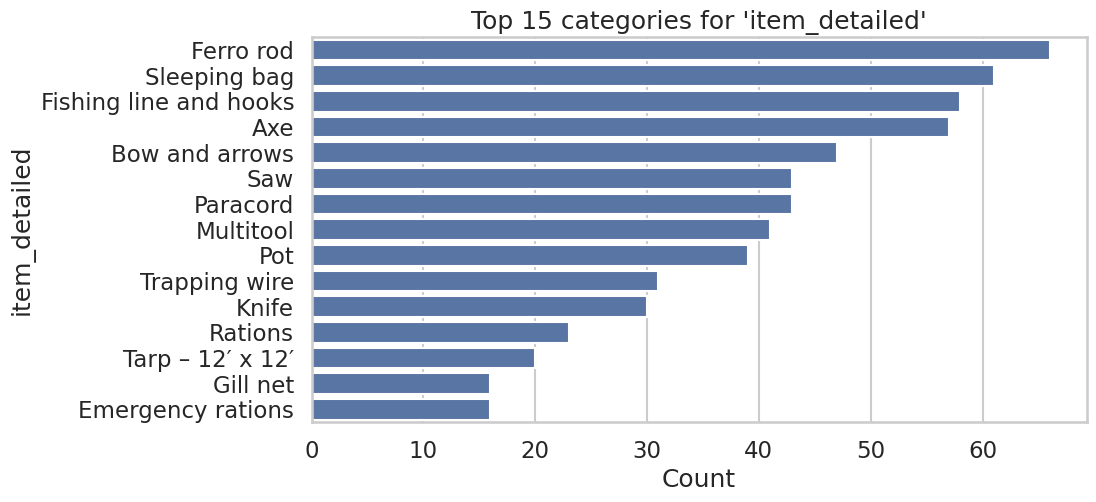


Loadouts: top values for 'name'


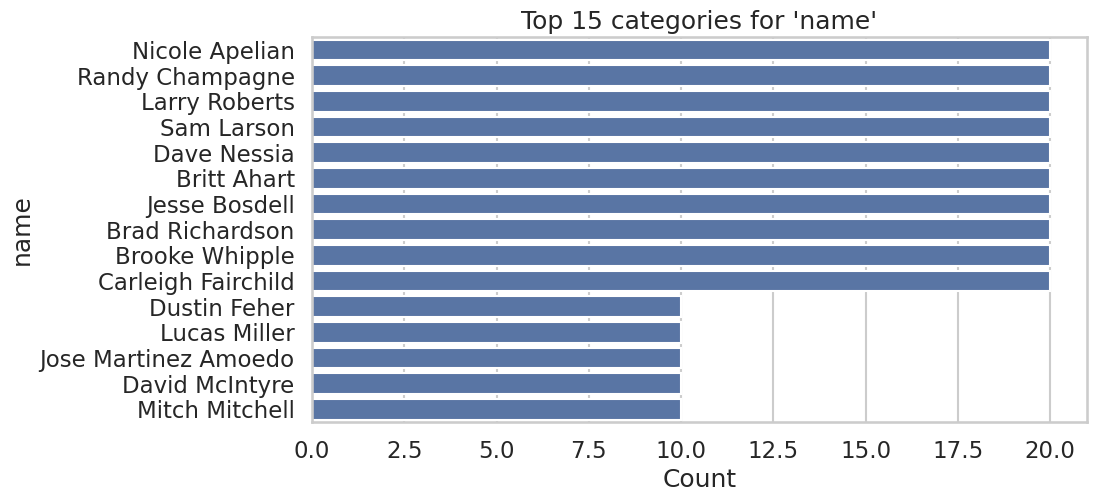

In [7]:
# Univariate plots
def plot_numeric_distributions(df: pd.DataFrame, title: str):
    numeric_cols = df.select_dtypes(include=["number"]).columns
    if len(numeric_cols) == 0:
        print(f"No numeric columns found for {title}.")
        return

    df_numeric = df[numeric_cols].dropna()

    plt.figure(figsize=(18, 10))
    df_numeric.hist(bins=20, figsize=(18, 10), layout=(int(np.ceil(len(numeric_cols) / 3)), 3))
    plt.suptitle(f"Numeric distributions for {title}", fontsize=18)
    plt.tight_layout()
    plt.show()

    # Boxplots for detecting outliers
    plt.figure(figsize=(18, 6))
    sns.boxplot(data=df_numeric, orient="h")
    plt.title(f"Numeric boxplots for {title}")
    plt.show()


def plot_top_categories(df: pd.DataFrame, column: str, top_n: int = 10):
    counts = df[column].value_counts().head(top_n)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title(f"Top {top_n} categories for '{column}'")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()


# Episodes: numeric and key categorical variables
print("Episodes: numeric variable distributions")
plot_numeric_distributions(episodes, "episodes")

for col in ["version", "season", "author"]:
    if col in episodes.columns:
        print(f"\nEpisodes: top values for '{col}'")
        plot_top_categories(episodes, col, top_n=10)

# Seasons: distributions by location and country
print("\nSeasons: numeric variable distributions")
plot_numeric_distributions(seasons, "seasons")

for col in ["location", "country"]:
    if col in seasons.columns:
        print(f"\nSeasons: top values for '{col}'")
        plot_top_categories(seasons, col, top_n=10)

# Survivalists: age, days lasted, gender, and reasons for tapping out
print("\nSurvivalists: numeric variable distributions")
plot_numeric_distributions(survivalists, "survivalists")

for col in ["gender", "reason_category", "result"]:
    if col in survivalists.columns:
        print(f"\nSurvivalists: top values for '{col}'")
        plot_top_categories(survivalists, col, top_n=10)

# Loadouts: most common items selected
print("\nLoadouts: most frequently chosen items")
for col in ["item", "item_detailed", "name"]:
    if col in loadouts.columns:
        print(f"\nLoadouts: top values for '{col}'")
        plot_top_categories(loadouts, col, top_n=15)

### Relationships within and across datasets

Here we explore **bivariate relationships** and **cross-dataset joins**, including:

- How **viewership and IMDb ratings** vary by season.
- How **locations and countries** relate to outcomes and survivors.
- How **survivalist characteristics** (age, gender) and **tap-out reasons** relate to **days lasted**.
- How **gear loadouts** (items chosen) relate to survival outcomes at a high level.

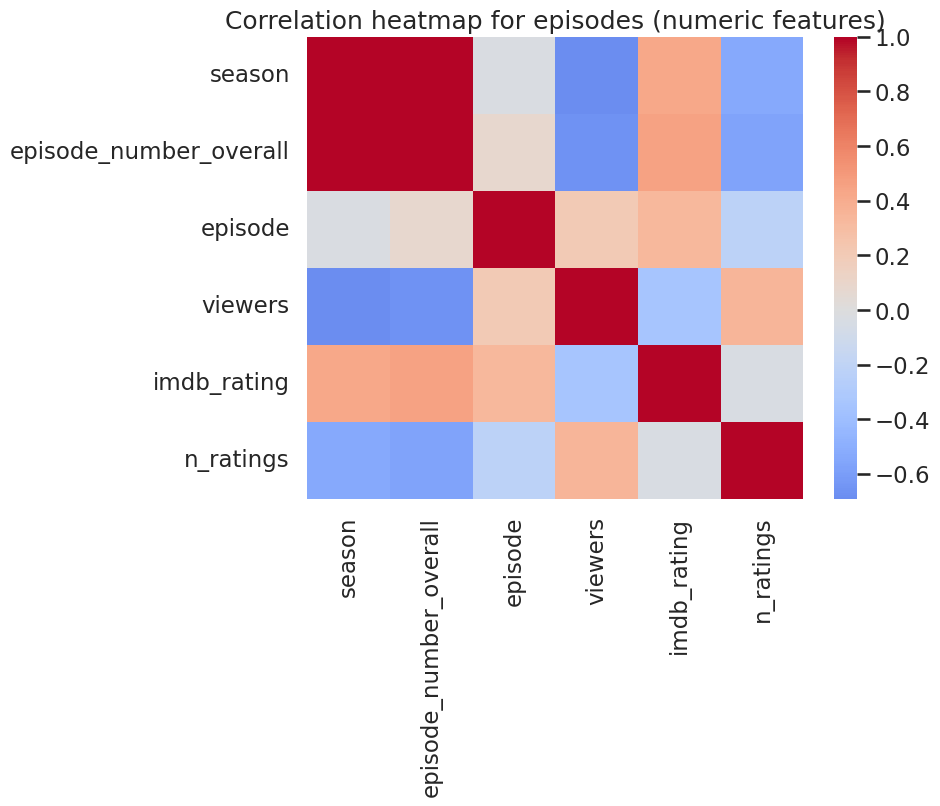

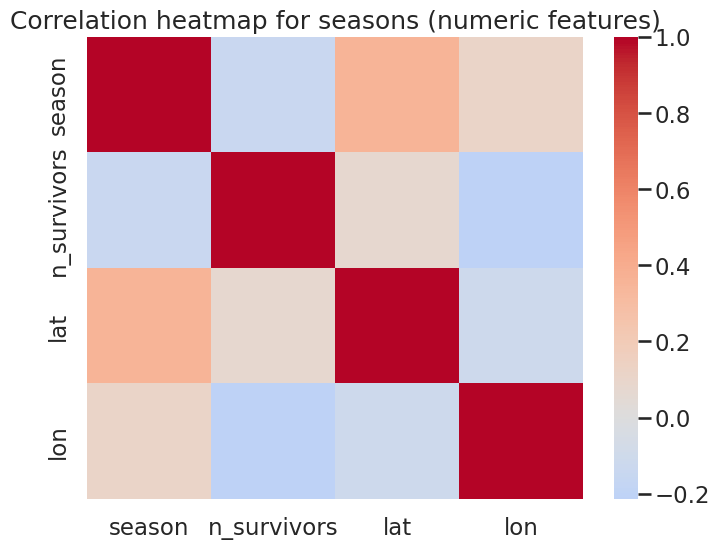

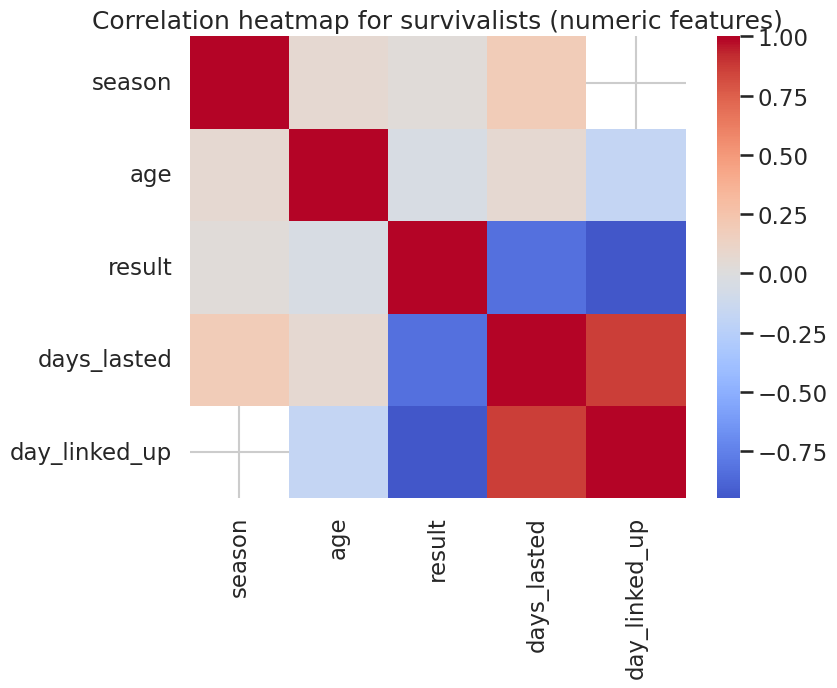

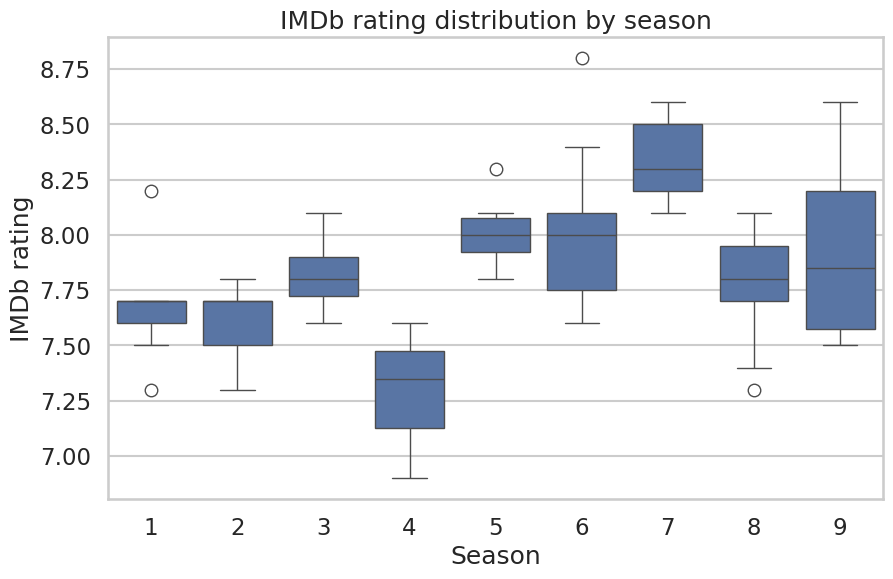

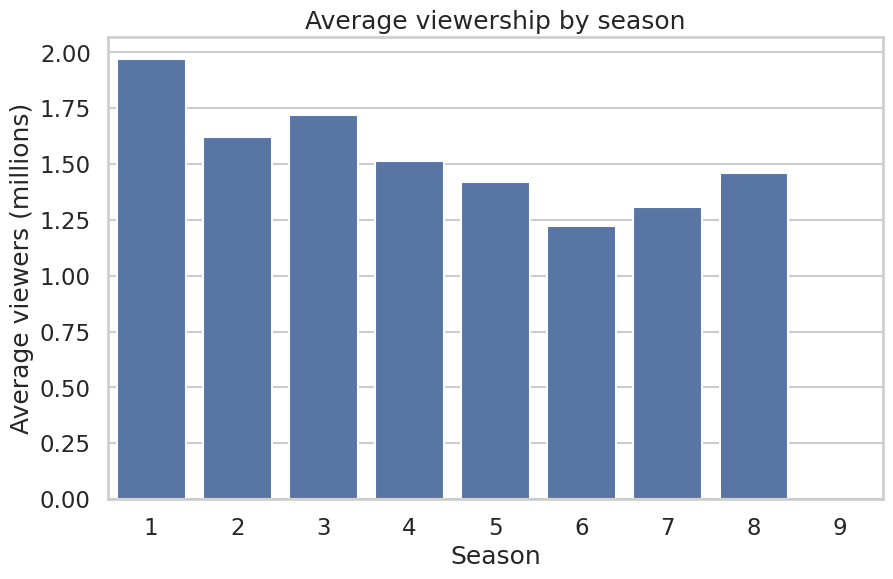

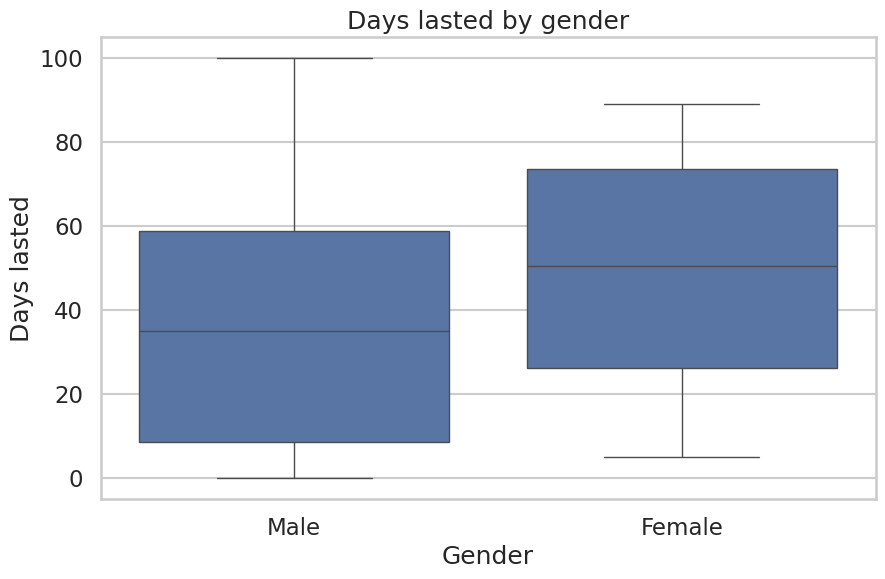

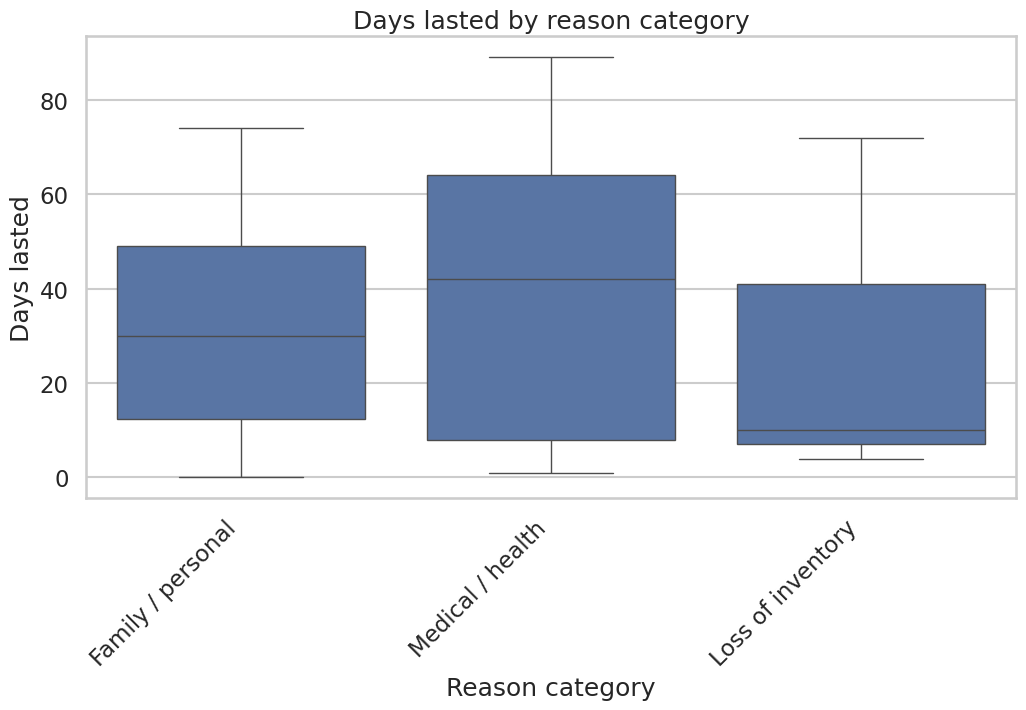

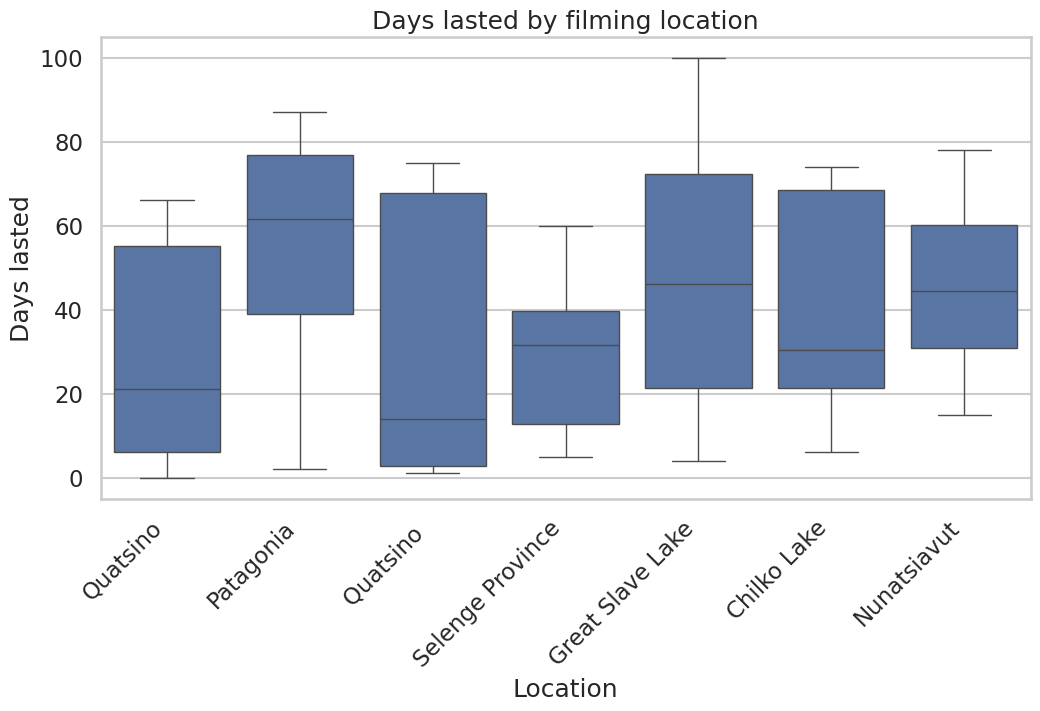


Average days lasted by item (top 15 items):


,days_lasted
item,
Slingshot,50.000000
Soap,49.000000
Trapping wire,48.652174
Frying pan,45.666667
Paracord,43.196429
Hammock,43.000000
Multitool,42.043478
Gillnet,40.812500
Bow and arrows,40.466667



Item frequencies by result (winner vs. others), top 10 items:


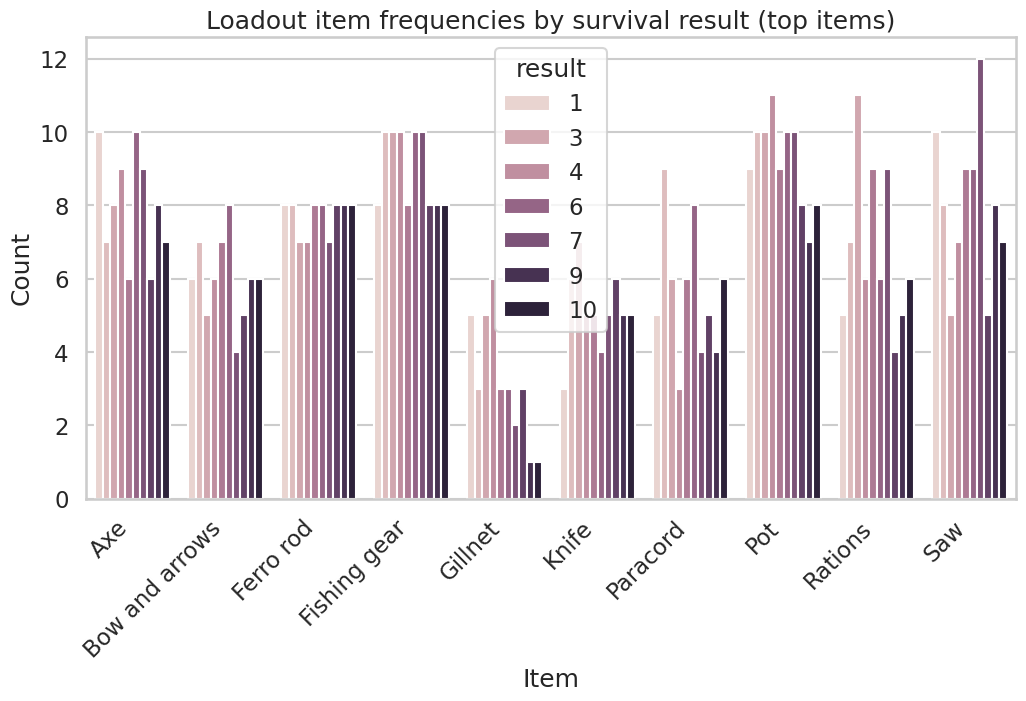

In [8]:
# Correlations within each dataset (numeric variables only)

for name, df in {
    "episodes": episodes,
    "seasons": seasons,
    "survivalists": survivalists,
}.items():
    numeric_cols = df.select_dtypes(include=["number"]).columns
    if len(numeric_cols) < 2:
        continue

    corr = df[numeric_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
    plt.title(f"Correlation heatmap for {name} (numeric features)")
    plt.show()

# Episodes: ratings and viewers by season
if {"season", "imdb_rating"}.issubset(episodes.columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=episodes, x="season", y="imdb_rating")
    plt.title("IMDb rating distribution by season")
    plt.xlabel("Season")
    plt.ylabel("IMDb rating")
    plt.show()

if {"season", "viewers"}.issubset(episodes.columns):
    season_viewership = episodes.groupby("season")["viewers"].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=season_viewership, x="season", y="viewers")
    plt.title("Average viewership by season")
    plt.xlabel("Season")
    plt.ylabel("Average viewers (millions)")
    plt.show()

# Survivalists: days lasted by gender and tap-out reason
if {"gender", "days_lasted"}.issubset(survivalists.columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=survivalists, x="gender", y="days_lasted")
    plt.title("Days lasted by gender")
    plt.xlabel("Gender")
    plt.ylabel("Days lasted")
    plt.show()

if {"reason_category", "days_lasted"}.issubset(survivalists.columns):
    plt.figure(figsize=(12, 6))
    top_reasons = survivalists["reason_category"].value_counts().index[:8]
    subs = survivalists[survivalists["reason_category"].isin(top_reasons)]
    sns.boxplot(data=subs, x="reason_category", y="days_lasted")
    plt.title("Days lasted by reason category")
    plt.xlabel("Reason category")
    plt.ylabel("Days lasted")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Join survivalists with seasons on season to add location and country
if "season" in survivalists.columns and "season" in seasons.columns:
    surv_with_season = survivalists.merge(
        seasons[[col for col in seasons.columns if col in ["season", "location", "country", "n_survivors"]]],
        on="season",
        how="left",
    )

    if {"location", "days_lasted"}.issubset(surv_with_season.columns):
        plt.figure(figsize=(12, 6))
        top_locations = surv_with_season["location"].value_counts().index[:8]
        subs = surv_with_season[surv_with_season["location"].isin(top_locations)]
        sns.boxplot(data=subs, x="location", y="days_lasted")
        plt.title("Days lasted by filming location")
        plt.xlabel("Location")
        plt.ylabel("Days lasted")
        plt.xticks(rotation=45, ha="right")
        plt.show()

# Join loadouts with survivalists on season + name to explore loadouts vs. outcome
join_keys = [col for col in ["season", "name"] if col in loadouts.columns and col in survivalists.columns]
if join_keys:
    loadouts_with_outcomes = loadouts.merge(
        survivalists[[col for col in survivalists.columns if col in join_keys + ["days_lasted", "result", "reason_category"]]],
        on=join_keys,
        how="left",
    )

    if {"item", "days_lasted"}.issubset(loadouts_with_outcomes.columns):
        print("\nAverage days lasted by item (top 15 items):")
        item_effect = (
            loadouts_with_outcomes.groupby("item")["days_lasted"]
            .mean()
            .sort_values(ascending=False)
            .head(15)
        )
        display(item_effect)

    if {"item", "result"}.issubset(loadouts_with_outcomes.columns):
        print("\nItem frequencies by result (winner vs. others), top 10 items:")
        item_result = (
            loadouts_with_outcomes.groupby(["item", "result"]).size().reset_index(name="count")
        )
        top_items = item_result["item"].value_counts().index[:10]
        item_result = item_result[item_result["item"].isin(top_items)]
        plt.figure(figsize=(12, 6))
        sns.barplot(data=item_result, x="item", y="count", hue="result")
        plt.title("Loadout item frequencies by survival result (top items)")
        plt.xlabel("Item")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.show()

### Time-based patterns

Finally, we briefly explore **time-based behavior** where dates are available:

- Episodes over time (air dates) and how **viewership** and **IMDb ratings** evolve.
- Drop-off dates at the **season level**, where available.

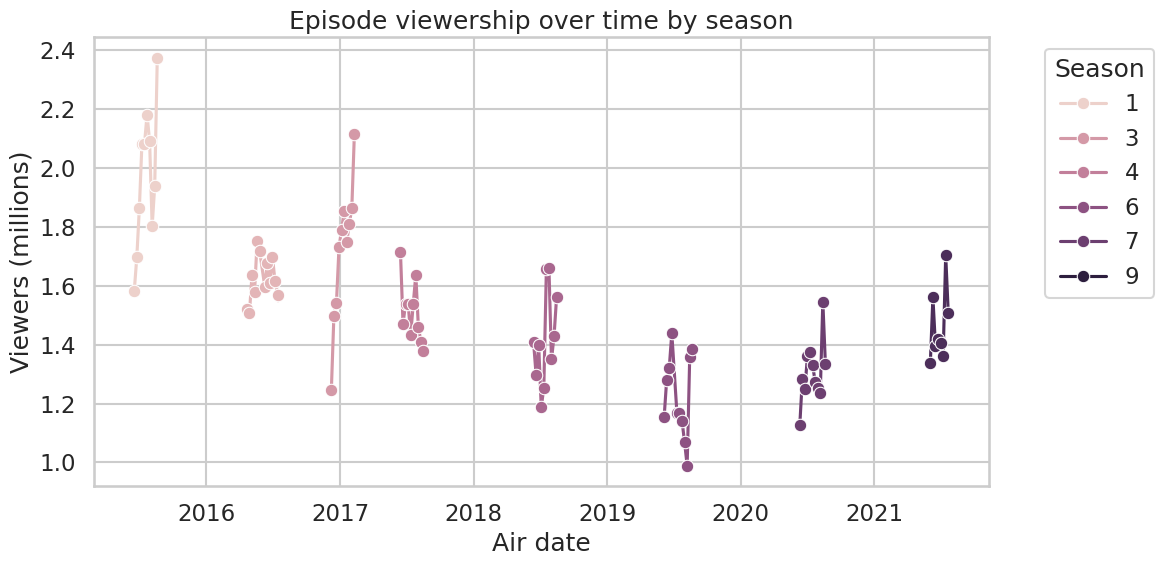

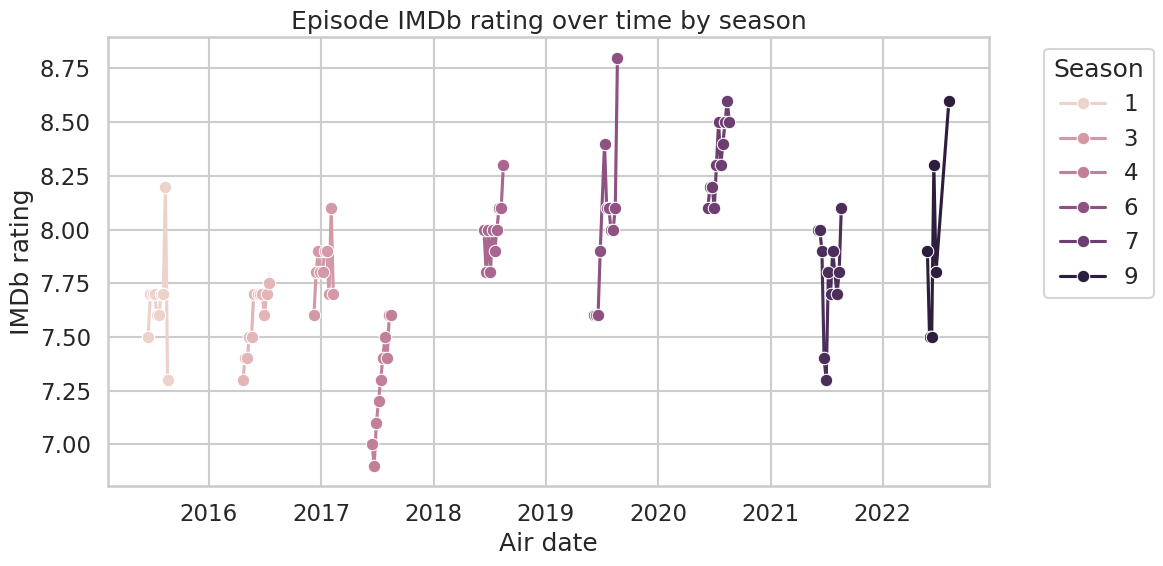

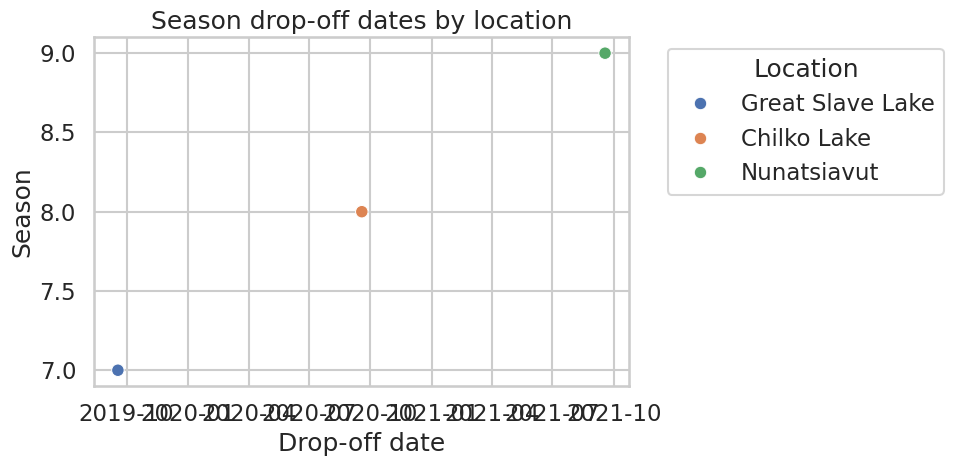

In [9]:
# Time-based exploration of episodes and seasons

# Episodes: trends over air_date
if "air_date" in episodes.columns:
    episodes_time = episodes.dropna(subset=["air_date"]).sort_values("air_date")

    if "viewers" in episodes_time.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=episodes_time, x="air_date", y="viewers", hue="season", marker="o")
        plt.title("Episode viewership over time by season")
        plt.xlabel("Air date")
        plt.ylabel("Viewers (millions)")
        plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    if "imdb_rating" in episodes_time.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=episodes_time, x="air_date", y="imdb_rating", hue="season", marker="o")
        plt.title("Episode IMDb rating over time by season")
        plt.xlabel("Air date")
        plt.ylabel("IMDb rating")
        plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

# Seasons: drop-off dates if available
if "date_drop_off" in seasons.columns:
    seasons_time = seasons.dropna(subset=["date_drop_off"]).sort_values("date_drop_off")
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=seasons_time, x="date_drop_off", y="season", hue="location")
    plt.title("Season drop-off dates by location")
    plt.xlabel("Drop-off date")
    plt.ylabel("Season")
    plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

### Question-driven EDA: key survival insights

After the general overview above, this section answers a set of **specific questions** about the Alone TV datasets:

1. **What is the distribution of participants' ages, and are there outliers (very young or very old contestants)?**
2. **What is the distribution of survival duration (`days_lasted`), and is it skewed?**
3. **What is the gender distribution across all seasons?**
4. **How are IMDb ratings distributed across episodes?**
5. **How does episode viewership vary across seasons?**
6. **What are the most frequently selected survival items (e.g., pot, axe, ferro rod)?**

Each subsection below briefly explains the goal, then uses the original dataframes loaded above:

- `episodes_data`
- `loadouts_data`
- `seasons_data`
- `survivalists_data`

to provide visual and numerical answers.

#### 1. Participants' ages: distribution and outliers

We first look at the **age distribution** of all survivalists and identify **potential outliers** (very young or very old contestants) using the standard IQR rule. We show:

- A histogram and boxplot of ages.
- Summary statistics.
- A table of contestants flagged as age outliers.

Age summary (years):
count    94.00000
mean     37.93617
std       8.84491
min      19.00000
25%      31.00000
50%      38.50000
75%      44.00000
max      61.00000
Name: age, dtype: float64

IQR-based age outlier thresholds: < 11.5 or > 63.5 years
Number of outlier contestants by age: 0


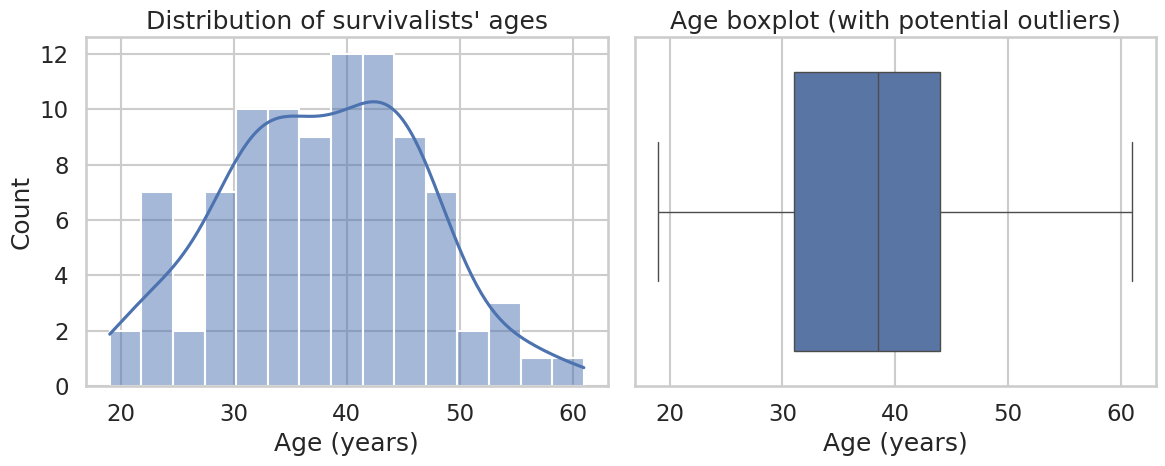

In [10]:
# Age distribution and outliers for survivalists

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# Work directly with the original survivalists_data loaded above
ages = survivalists_data["age"].dropna()

print("Age summary (years):")
print(ages.describe())

# Identify age outliers using the IQR rule
q1, q3 = ages.quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"\nIQR-based age outlier thresholds: < {lower_bound:.1f} or > {upper_bound:.1f} years")

outliers_age = survivalists_data[(survivalists_data["age"] < lower_bound) | (survivalists_data["age"] > upper_bound)]

print(f"Number of outlier contestants by age: {len(outliers_age)}")
if not outliers_age.empty:
    display(outliers_age[["season", "name", "age", "gender"]].sort_values("age"))

# Plot age histogram and boxplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(ages, bins=15, kde=True)
plt.title("Distribution of survivalists' ages")
plt.xlabel("Age (years)")

plt.subplot(1, 2, 2)
sns.boxplot(x=ages, orient="h")
plt.title("Age boxplot (with potential outliers)")
plt.xlabel("Age (years)")

plt.tight_layout()
plt.show()

#### 2. Survival duration (`days_lasted`): distribution and skewness

Next, we examine how long contestants stay in the game, measured by `days_lasted` in the survivalists data. We:

- Plot the distribution of `days_lasted`.
- Compute summary statistics.
- Quantify **skewness** to see whether the distribution is symmetric or skewed (e.g., many early exits vs. a few very long stays).

Survival duration summary (days):
count     94.000000
mean      39.042553
std       27.849409
min        0.000000
25%       10.500000
50%       39.500000
75%       63.750000
max      100.000000
Name: days_lasted, dtype: float64

Skewness of days_lasted: 0.176


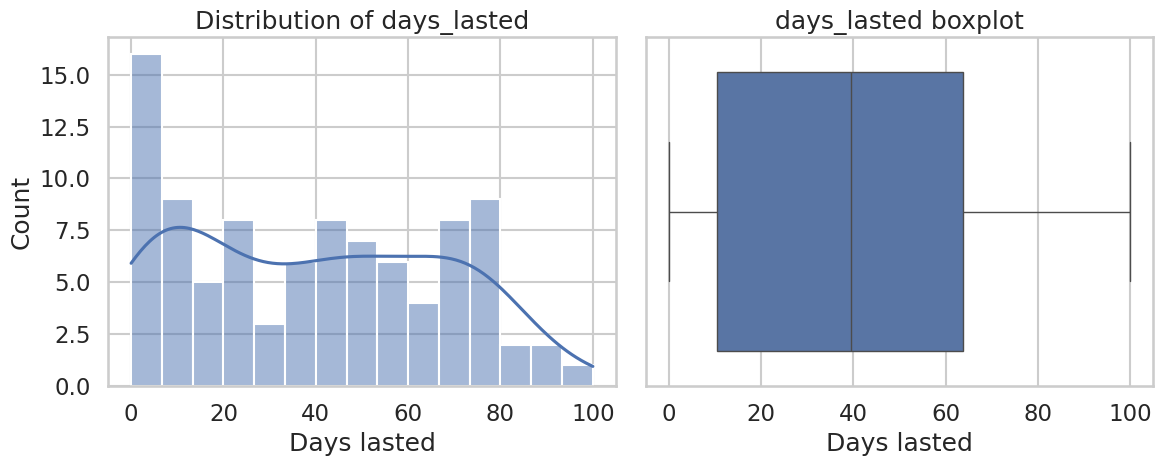

In [11]:
# Survival duration distribution and skewness

survival_days = survivalists_data["days_lasted"].dropna()

print("Survival duration summary (days):")
print(survival_days.describe())
print(f"\nSkewness of days_lasted: {survival_days.skew():.3f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(survival_days, bins=15, kde=True)
plt.title("Distribution of days_lasted")
plt.xlabel("Days lasted")

plt.subplot(1, 2, 2)
sns.boxplot(x=survival_days, orient="h")
plt.title("days_lasted boxplot")
plt.xlabel("Days lasted")

plt.tight_layout()
plt.show()

#### 3. Gender distribution across all seasons

Here we summarize **how many male and female contestants** appear across all seasons. We:

- Create a frequency table of `gender`.
- Visualize the distribution with a bar chart.
- Optionally break down gender counts by `season`.

Overall gender counts:
gender
Male      74
Female    20
Name: count, dtype: int64


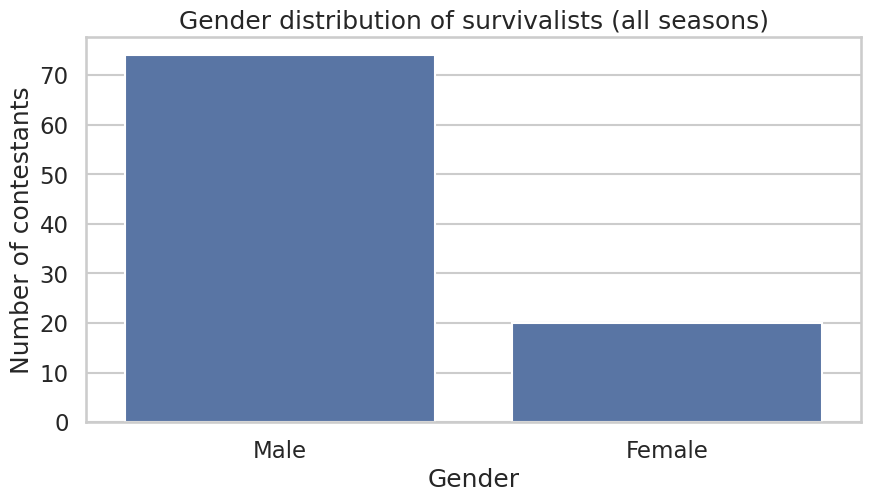


Gender counts by season:


gender,Female,Male
season,,
1,0,10
2,3,7
3,3,7
4,1,13
5,3,7
6,3,7
7,2,8
8,3,7
9,2,8


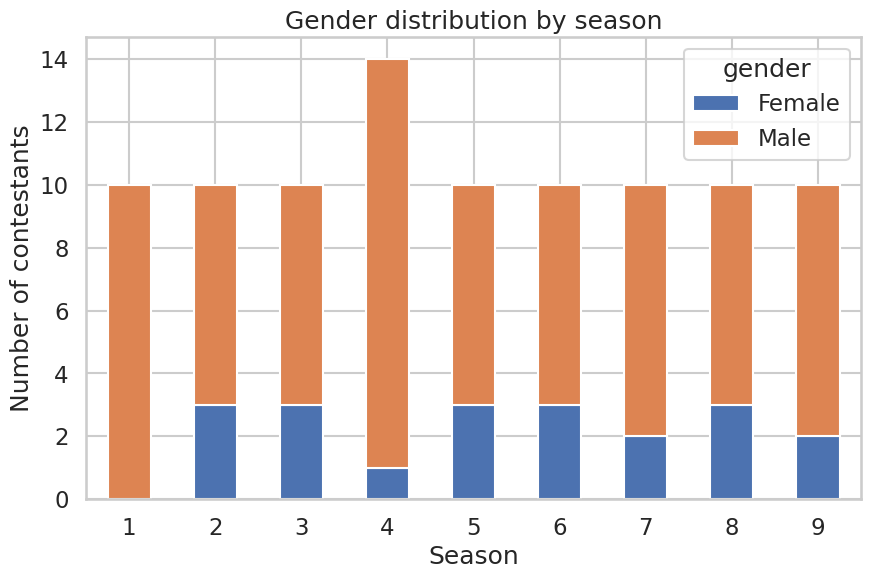

In [12]:
# Gender distribution overall and by season

# Overall gender counts
print("Overall gender counts:")
gender_counts = survivalists_data["gender"].value_counts(dropna=False)
print(gender_counts)

plt.figure(figsize=(10, 5))
sns.countplot(x="gender", data=survivalists_data)
plt.title("Gender distribution of survivalists (all seasons)")
plt.xlabel("Gender")
plt.ylabel("Number of contestants")
plt.show()

# Gender by season (stacked counts style via pivot table)
if "season" in survivalists_data.columns:
    gender_by_season = survivalists_data.pivot_table(
        index="season", columns="gender", values="name", aggfunc="count", fill_value=0
    )
    print("\nGender counts by season:")
    display(gender_by_season)

    gender_by_season.plot(kind="bar", stacked=True, figsize=(10, 6))
    plt.title("Gender distribution by season")
    plt.xlabel("Season")
    plt.ylabel("Number of contestants")
    plt.xticks(rotation=0)
    plt.show()

#### 4. IMDb ratings across episodes

Using `episodes_data`, we explore how **IMDb ratings** are distributed and whether there are clearly higher- or lower-rated episodes. We:

- Plot the distribution of `imdb_rating` across all episodes.
- Summarize key statistics.
- Optionally highlight ratings by `season`.

IMDb rating summary:
count    93.000000
mean      7.821505
std       0.365302
min       6.900000
25%       7.600000
50%       7.800000
75%       8.100000
max       8.800000
Name: imdb_rating, dtype: float64


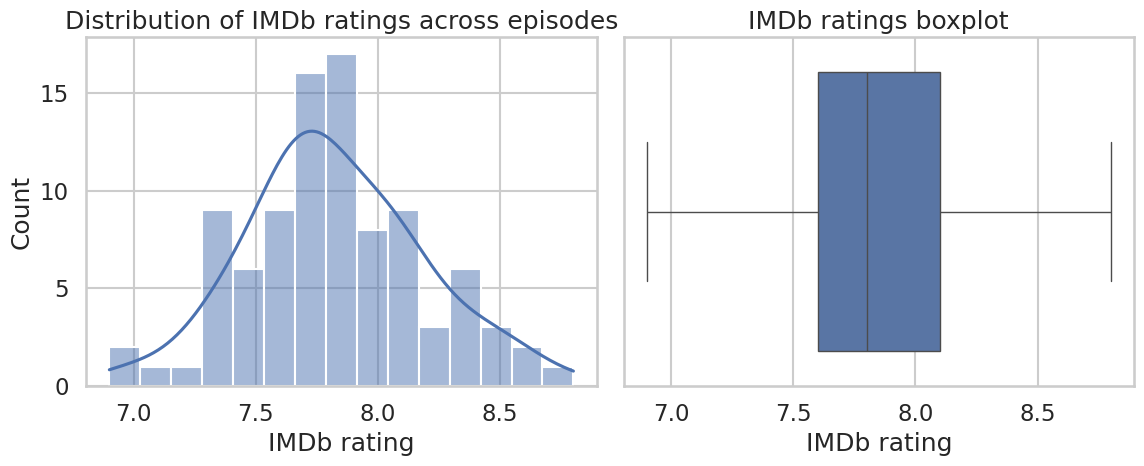

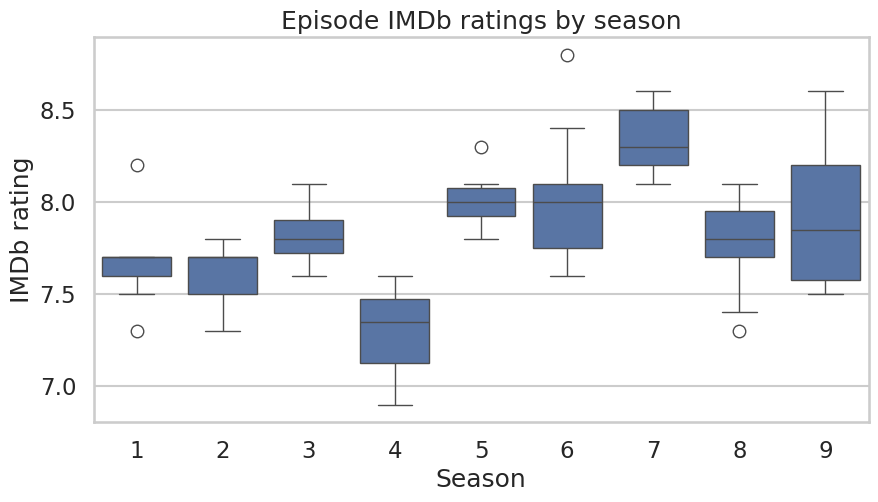

In [13]:
# IMDb rating distribution across episodes

ratings = episodes_data["imdb_rating"].dropna()

print("IMDb rating summary:")
print(ratings.describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(ratings, bins=15, kde=True)
plt.title("Distribution of IMDb ratings across episodes")
plt.xlabel("IMDb rating")

plt.subplot(1, 2, 2)
sns.boxplot(x=ratings, orient="h")
plt.title("IMDb ratings boxplot")
plt.xlabel("IMDb rating")

plt.tight_layout()
plt.show()

# Rating by season (if available)
if "season" in episodes_data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="season", y="imdb_rating", data=episodes_data)
    plt.title("Episode IMDb ratings by season")
    plt.xlabel("Season")
    plt.ylabel("IMDb rating")
    plt.show()

#### 5. Episode viewership across seasons

Next, we investigate how **episode viewership** (in millions) varies across seasons using `episodes_data`. We:

- Plot the overall distribution of `viewers`.
- Compare average viewership across seasons.
- Optionally visualize episode-level viewership by season.

Viewership summary (millions):
count    83.000000
mean      1.527880
std       0.270149
min       0.989000
25%       1.344000
50%       1.507000
75%       1.687500
max       2.375000
Name: viewers, dtype: float64


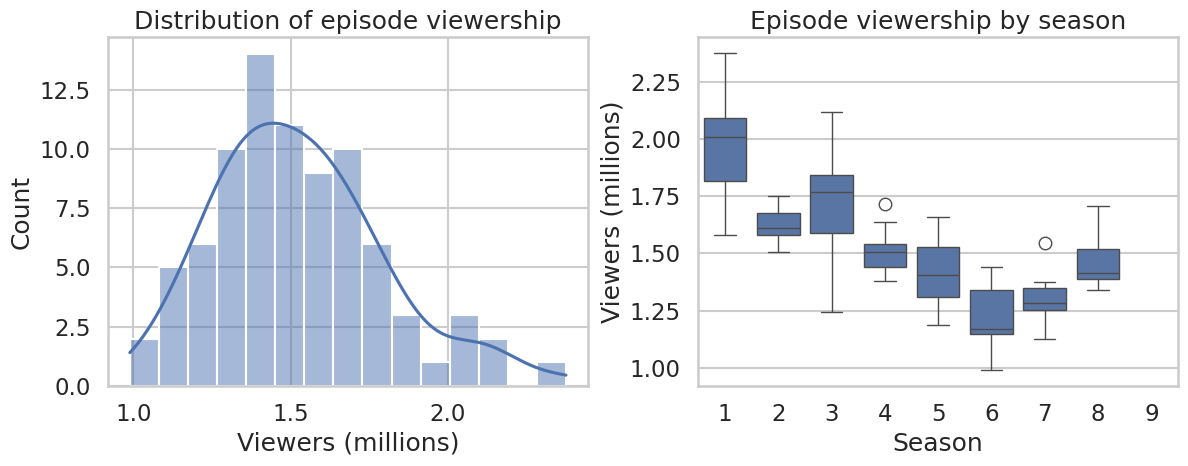


Average viewership by season:


,season,viewers
0,1,1.969700
1,2,1.619077
2,3,1.720400
3,4,1.512200
4,5,1.420400
5,6,1.224545
6,7,1.306818
7,8,1.461750
8,9,NaN


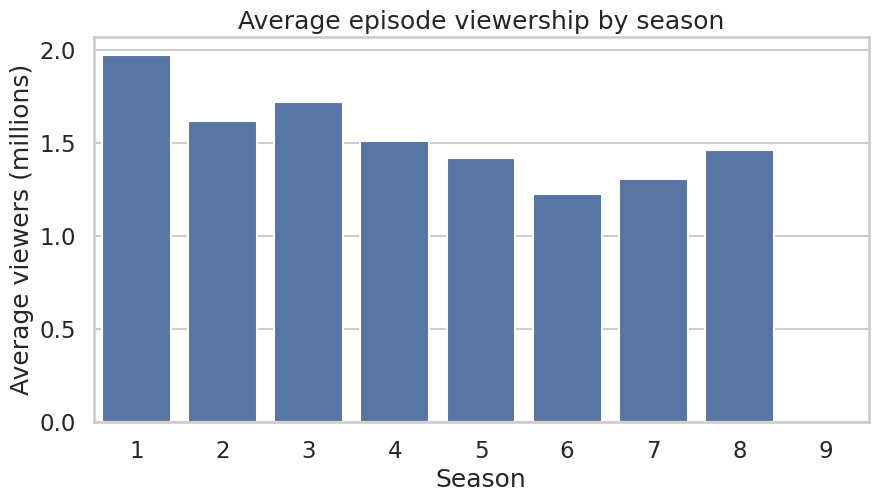

In [14]:
# Episode viewership across seasons

viewers = episodes_data["viewers"].dropna()

print("Viewership summary (millions):")
print(viewers.describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(viewers, bins=15, kde=True)
plt.title("Distribution of episode viewership")
plt.xlabel("Viewers (millions)")

plt.subplot(1, 2, 2)
if "season" in episodes_data.columns:
    sns.boxplot(x="season", y="viewers", data=episodes_data)
    plt.title("Episode viewership by season")
    plt.xlabel("Season")
    plt.ylabel("Viewers (millions)")
else:
    sns.boxplot(x=viewers, orient="h")
    plt.title("Viewership boxplot")
    plt.xlabel("Viewers (millions)")

plt.tight_layout()
plt.show()

# Average viewership per season (if season column exists)
if "season" in episodes_data.columns:
    avg_viewers_by_season = episodes_data.groupby("season")["viewers"].mean().reset_index()
    print("\nAverage viewership by season:")
    display(avg_viewers_by_season)

    plt.figure(figsize=(10, 5))
    sns.barplot(x="season", y="viewers", data=avg_viewers_by_season)
    plt.title("Average episode viewership by season")
    plt.xlabel("Season")
    plt.ylabel("Average viewers (millions)")
    plt.show()

#### 6. Most frequently selected survival items

Finally, we use `loadouts_data` to see **which survival items are selected most often** across all contestants and seasons. This highlights common strategic choices such as pots, axes, and ferro rods. We:

- Count how often each `item` is chosen.
- Display the top items in a table and bar chart.

Top survival items by frequency:


,count
item,
Pot,92
Fishing gear,90
Sleeping bag,85
Axe,80
Saw,80
Ferro rod,77
Rations,68
Bow and arrows,60
Paracord,56


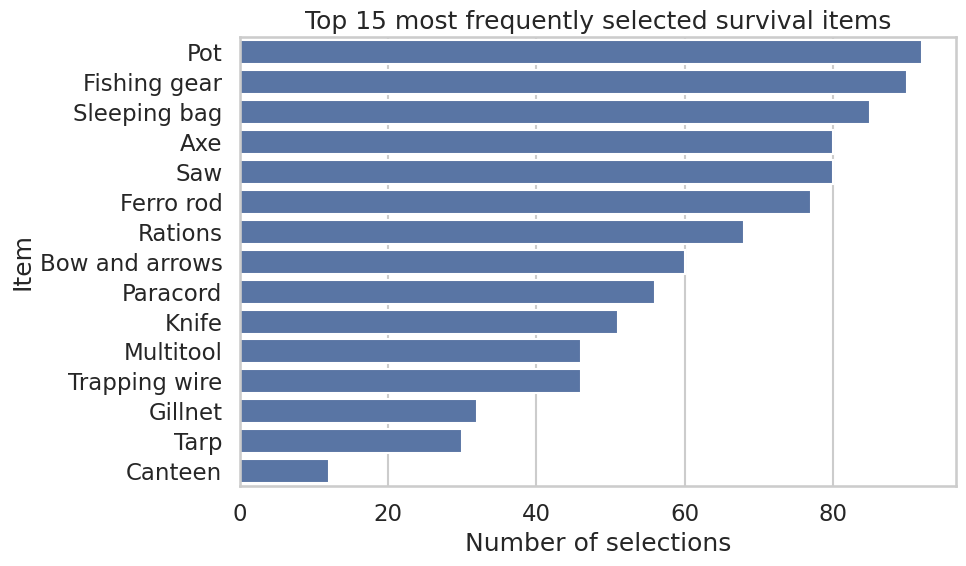

In [15]:
# 6. Most frequently selected survival items

# Count how often each item is chosen
item_counts = loadouts_data["item"].value_counts()

print("Top survival items by frequency:")
display(item_counts.to_frame(name="count").head(15))

# Bar chart of the top items
top_n = 15
top_items = item_counts.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, orient="h")
plt.title(f"Top {top_n} most frequently selected survival items")
plt.xlabel("Number of selections")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

## Key Questions Explored in This EDA

After introducing the datasets and their structure, this section answers a set of **concrete analytical questions** using only the four loaded dataframes:

- `episodes_data`
- `loadouts_data`
- `seasons_data`
- `survivalists_data`

The questions we will address are:

1. **What is the distribution of participants’ ages, and are there outliers (very young or very old contestants)?**
2. **What is the distribution of survival duration (`days_lasted`), and is it skewed?**
3. **What is the gender distribution across all seasons?**
4. **How are IMDb ratings distributed across episodes?**
5. **How does episode viewership vary across seasons?**
6. **What are the most frequently selected survival items (e.g., pot, axe, ferro rod)?**

The following code cell computes the relevant summaries and plots for each of these questions and prints short textual interpretations so that the notebook is self-explanatory.